In [1]:
import os
import pandas as pd
import numpy as np
import random

import sys
sys.path.insert(0, '..')

from unpast.run_unpast import unpast
from unpast.utils.method import prepare_input_matrix 
from unpast.utils.consensus import make_consensus_biclusters
from unpast.utils.io import read_bic_table, write_bic_table

from unpast.utils.figs import draw_heatmap2
from matplotlib import pyplot as plt

In [2]:
# specify output folder and output file prefix
fname= "data/ST/GSE250138_anca_samples_processed"
basename = 'ST'
out_dir = "ST_results/"
# input .tsv file; features in rows, samples in columns
exprs_file = fname+".tsv.gz" 

In [3]:
n_runs = 5
analysis_seed = 0
random.seed(analysis_seed)
seeds = []
for i in range(n_runs):
    seeds.append(random.randint(0,1000000))
print("generate ",n_runs," seeds",seeds)

generate  5  seeds [885440, 403958, 794772, 933488, 441001]


In [4]:
biclustering_results = []
for seed in seeds:
    results = unpast(exprs_file, basename,
                  out_dir=out_dir,
                  seed=seed,
                  verbose= False
                 )
    # make bicluster ids unique: 'seed=<seed>_<bicluster id>'
    results.index = ["seed="+str(seed)+"_"+str(x) for x in results.index.values ]
    biclustering_results.append(results)
    print("seed = %s\tn_biclusters: %s"%(seed, results.shape[0]))

seed = 885440	n_biclusters: 160
seed = 403958	n_biclusters: 165
seed = 794772	n_biclusters: 155
seed = 933488	n_biclusters: 164
seed = 441001	n_biclusters: 176


In [5]:
exprs_z = prepare_input_matrix(pd.read_csv(exprs_file,sep="\t",index_col = 0), min_n_samples=5,ceiling=3)
consensus_biclusters = make_consensus_biclusters(biclustering_results, 
                                                 exprs_z,
                                                 seed = analysis_seed,
                                                 verbose = True,
                                                 plot = False)



97 s for similarity matrix
	Running Louvain ...
		modularity: newman


sknetwork version used: 0.33.0


	curve type: increasing
	Louvain runtime: modules detected in 0.69 s.
	modules: 197, not clustered features 187 
		similarity cutoff: 0.73 modularity: 0.994
keep genes included in at least 2 merged biclusters
all consensus biclusters: 394
detected 2+ times:187
72 s for making consensus biclusters from consensus gene sets


In [9]:
consensus_biclusters 

SNR n_genes n_samples                 genes  \
0    3.618431       2        36        {CYP1A2, GJA8}   
1     3.49952       2        22       {WDR87, FBXO47}   
2    3.381516       2        20          {SI, OR5B12}   
3    3.380988       2        20      {GUCY2F, ARL13A}   
4    3.283934       2        18         {HAS1, OR2C3}   
..        ...     ...       ...                   ...   
182  0.992527       2      2932   {ATP6V1B2, LAMTOR1}   
183  0.969759       3      3136     {F3, TSPAN2, NES}   
184  0.933791       2      5090        {RNF149, CHD4}   
185  0.879403       3      5322  {DDR1, NDRG2, HOXB3}   
186  0.775525       3      4668  {LAMP2, GSTO1, BRI3}   

                                               samples           genes_up  \
0    {CAAACTATTGAGCTTC-1_V5_C, ACGCGTTTCTTAAGAG-1_V...     {CYP1A2, GJA8}   
1    {CGCTATACCGCCCACT-1_V1_D, CTCCGGCTTGTAGACA-1_V...    {WDR87, FBXO47}   
2    {TTACTCTGGTACGTAC-1_V3_A, TCTTACTTATGCCTCT-1_V...       {SI, OR5B12}   
3    {CCTTCAGTTAAAGTGA-1_V5_B, AATATCGAATCAATGC-1_V...   {GUCY2F, ARL13A}   
4    {TAGGTCCAAGTAAGGA-1_V6_D, GCCTACGTTCTGTGCA-1_V...      {HAS1, OR2C3}   
..                                                 ...                ...   
182  {ATAAACGGACCCGTAA-1_V3_C, CCCGTTTCGCAGATGT-1_V...                 {}   
183  {GTCTGTAGGTTGAACA-1_V4_B, ACATCGATCGTTTACC-1_V...  {F3, TSPAN2, NES}   
184  {CTTTAGGAACACTGTT-1_V5_D, AGTCGGCTCAACTTTA-1_V...                 {}   
185  {CTTTAGGAACACTGTT-1_V5_D, GTCTGTAGGTTGAACA-1_V...                 {}   
186  {ATAAACGGACCCGTAA-1_V3_C, AATCTGGCTTTCTAGT-1_V...                 {}   

               genes_down          gene_indexes  \
0                      {}          {980, 12607}   
1                      {}        {15481, 13975}   
2                      {}          {3772, 9661}   
3                      {}        {17537, 17610}   
4                      {}         {1787, 15876}   
..                    ...                   ...   
182   {ATP6V1B2, LAMTOR1}          {7297, 9957}   
183                    {}      {1190, 806, 927}   
184        {RNF149, CHD4}         {2322, 10407}   
185  {DDR1, NDRG2, HOXB3}  {5649, 14207, 11631}   
186  {LAMP2, GSTO1, BRI3}   {9034, 6795, 17660}   

                                        sample_indexes direction  \
0    {3328, 8323, 4228, 6661, 6287, 8850, 9106, 283...        UP   
1    {2688, 5131, 8845, 1686, 8855, 9116, 4125, 438...        UP   
2    {10243, 9870, 10128, 5010, 414, 8096, 8993, 50...        UP   
3    {9738, 781, 5651, 2204, 8733, 4005, 8997, 9638...        UP   
4    {10435, 4612, 9798, 5928, 4941, 3887, 10682, 7...        UP   
..                                                 ...       ...   
182  {3, 8196, 8197, 6, 12, 13, 15, 16, 8208, 18, 1...      DOWN   
183  {0, 2, 8195, 8196, 6, 7, 8198, 11, 12, 8203, 1...        UP   
184  {1, 2, 3, 5, 6, 10, 12, 13, 14, 16, 17, 18, 19...      DOWN   
185  {0, 3, 4, 8, 11, 14, 18, 19, 23, 24, 25, 26, 3...      DOWN   
186  {8192, 3, 4, 8196, 8197, 7, 11, 12, 8203, 8205...      DOWN   

     detected_n_times                                                ids  
0                   4  {seed=933488_1, seed=403958_2, seed=441001_0, ...  
1                   2                     {seed=403958_3, seed=885440_2}  
2                   2                     {seed=403958_5, seed=441001_1}  
3                   3      {seed=794772_2, seed=441001_2, seed=885440_3}  
4                   5  {seed=403958_6, seed=794772_3, seed=885440_4, ...  
..                ...                                                ...  
182                 3  {seed=885440_152, seed=403958_156, seed=933488...  
183                 3  {seed=933488_156, seed=794772_142, seed=403958...  
184                 2                 {seed=794772_150, seed=441001_169}  
185                 2                 {seed=441001_164, seed=933488_162}  
186                 2                 {seed=794772_151, seed=441001_172}  

[187 rows x 12 columns]

In [10]:
outfile = out_dir+"/"+basename+".consensus_seed="+str(analysis_seed)
outfile += ".biclusters.tsv" 
print(outfile)
write_bic_table(consensus_biclusters,outfile)

ST_results//ST.consensus_seed=0.biclusters.tsv


In [11]:
def collapse_same_biclusters(df, group_field, sum_field, set_union_field):
    df["index"]=df.index
    # Group by the specified field
    def aggregate_group(group):
        # Keep the first row as a base
        row = group.iloc[0].copy()
        # Sum the specified field
        row[sum_field] = group[sum_field].sum()
        # Perform a set union on the specified field
        row[set_union_field] = set().union(*group[set_union_field])
        return row

    # Apply the aggregation function to each group
    collapsed = df.groupby(group_field, as_index=True).apply(aggregate_group,include_groups=False).reset_index(drop=True)
    collapsed.set_index("index",inplace=True)
    return collapsed.sort_index()

consensus_biclusters["genes2"] = consensus_biclusters["genes"].apply(lambda row:" ".join(row)) 
consensus_biclusters = collapse_same_biclusters(consensus_biclusters,
                         group_field='genes2',
                         sum_field='detected_n_times',
                         set_union_field='ids')

consensus_biclusters = consensus_biclusters.sort_values(["n_genes","n_samples"],ascending = [False,True])

In [12]:
consensus_biclusters 

SNR  n_genes  n_samples  \
index                                 
125    1.720269      272       4028   
121    1.763544      112       5205   
154    1.411023       42       5132   
116    2.091858       39        632   
126    1.710719       36       2692   
...         ...      ...        ...   
178    1.080621        2       4073   
172    1.163016        2       4157   
175    1.139654        2       4174   
136    1.559815        2       4368   
184    0.933791        2       5090   

                                                   genes  \
index                                                      
125    {ALAD, SUSD2, UPB1, SLC6A19, GCHFR, GLYAT, SLC...   
121    {MPST, SULT1C2, ALDH2, INSR, FBP1, SCRN2, PTH1...   
154    {TIMP1, GGT5, CD99, C1QC, ARPC1B, EMILIN1, TPM...   
116    {NTNG1, AL590560.2, FGF1, NES, F3, TNNI1, DDN,...   
126    {CASR, TSPAN8, GSTM3, CLDN16, MFSD4A, KCNJ1, B...   
...                                                  ...   
178                                      {COX5B, NDUFB9}   
172                                        {TYMP, ODF3B}   
175                                    {SERPINA5, HOXD8}   
136                                       {FKBP5, DDIT4}   
184                                       {RNF149, CHD4}   

                                                 samples  \
index                                                      
125    {CTTTAGGAACACTGTT-1_V5_D, CTCGAGGTCGAACAGT-1_V...   
121    {CTTTAGGAACACTGTT-1_V5_D, CGGGCGATGGATCACG-1_V...   
154    {GTCTGTAGGTTGAACA-1_V4_B, CGGGCGATGGATCACG-1_V...   
116    {ATAAAGGCTCGGTCGT-1_V3_C, GAGCGAGGGAGTACCG-1_V...   
126    {TTGAGAGTACTGCTAA-1_V2_C, CCCGTTTCGCAGATGT-1_V...   
...                                                  ...   
178    {AATCTGGCTTTCTAGT-1_V5_D, TTGAGAGTACTGCTAA-1_V...   
172    {TTGAGAGTACTGCTAA-1_V2_C, CTCGAGGTCGAACAGT-1_V...   
175    {ATAAACGGACCCGTAA-1_V3_C, GTCGTACCATCTCGGG-1_V...   
136    {CATGGCAGGAAGATCG-1_V3_A, TAGAGATCATGCAACT-1_V...   
184    {CTTTAGGAACACTGTT-1_V5_D, AGTCGGCTCAACTTTA-1_V...   

                                                genes_up       genes_down  \
index                                                                       
125    {ALAD, SUSD2, UPB1, SLC6A19, GCHFR, GLYAT, SLC...               {}   
121    {MPST, SULT1C2, ALDH2, INSR, SCRN2, FBP1, PTH1...               {}   
154    {TIMP1, GGT5, CD99, C1QC, ARPC1B, EMILIN1, TPM...               {}   
116    {NTNG1, AL590560.2, FGF1, NES, F3, TNNI1, DDN,...               {}   
126    {CASR, TSPAN8, GSTM3, CLDN16, MFSD4A, KCNJ1, B...               {}   
...                                                  ...              ...   
178                                                   {}  {COX5B, NDUFB9}   
172                                        {TYMP, ODF3B}               {}   
175                                    {SERPINA5, HOXD8}               {}   
136                                       {DDIT4, FKBP5}               {}   
184                                                   {}   {RNF149, CHD4}   

                                            gene_indexes  \
index                                                      
125    {6656, 10242, 16902, 8712, 15370, 7178, 11788,...   
121    {8707, 2052, 8197, 7176, 7177, 15380, 16923, 8...   
154    {5624, 14093, 2574, 17168, 9744, 6803, 14488, ...   
116    {13184, 13313, 9484, 5005, 7312, 5905, 9108, 2...   
126    {14210, 12169, 12426, 3341, 4623, 1552, 16660,...   
...                                                  ...   
178                                         {7701, 2293}   
172                                       {17145, 17146}   
175                                        {2586, 12158}   
136                                         {5784, 8791}   
184                                        {2322, 10407}   

                                          sample_indexes direction  \
index                                                                
125    {8192, 1, 2,

In [13]:
from unpast.utils.io import write_bic_table
outfile = out_dir+"/"+basename+".consensus_seed="+str(analysis_seed)
outfile += ".corrected_biclusters.tsv" 
print(outfile)
write_bic_table(consensus_biclusters,outfile)

#from unpast.utils.io import read_bic_table
#consensus_biclusters = read_bic_table(outfile)

ST_results//ST.consensus_seed=0.corrected_biclusters.tsv


#### or load precomputed biclusters for ANCA

In [4]:
outfile = out_dir+"/"+basename+".consensus_seed="+str(analysis_seed)
outfile += ".biclusters.tsv" 
from unpast.utils.io import read_bic_table
consensus_biclusters =  read_bic_table(outfile)

exprs = pd.read_csv(exprs_file,sep="\t",index_col = 0)

# filter and z-score transform input matrix, limit z-scores to [-3,3]
exprs_z = prepare_input_matrix(exprs, min_n_samples=5,ceiling=3)

In [5]:
annot = pd.read_csv("data/ST/GSE250138_anca_samples_processed.obs.tsv.gz",sep  ="\t",index_col=0)
annot = annot.loc[:,["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]] # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
annot = annot.fillna("NA")
annot.head(3)

Sample  leiden_1  leiden_2 annot_v2  \
AAACGAGACGGTTGAT-1_V5_A   V5_A         3         6       NA   
AAATAGGGTGCTATTG-1_V5_A   V5_A         1         9       NA   
AAATTTGCGGGTGTGG-1_V5_A   V5_A         4        15       NA   

                                       cluster_annot  \
AAACGAGACGGTTGAT-1_V5_A  Inflamed tubulointerstitial   
AAATAGGGTGCTATTG-1_V5_A                       PT/LOH   
AAATTTGCGGGTGTGG-1_V5_A                       PT/LOH   

                                 cluster_annot_broad  
AAACGAGACGGTTGAT-1_V5_A  Inflamed tubulointerstitial  
AAATAGGGTGCTATTG-1_V5_A                      Tubular  
AAATTTGCGGGTGTGG-1_V5_A                      Tubular

In [9]:
color_dict = {}

color_dict["annot_v2"] = {'Crescent':"red", 'Normal':"grey", 'Uncertain':"blue", 'NA':"white"} 
# annotated spots
# annot.loc[annot["annot_v2"]!='NA', ]
color_dict["cluster_annot"] = {'CNT/PC': '#00441B',
 'CNT/PC/IC': '#1B7837',
 'DCT/CNT': '#5AAE61',
 'Inflamed glomerular': '#900D09', #
 'Inflamed tubulointerstitial': '#d62728', #
 'LOH': '#E7D4E8',
 'Normal glomerular': '#d2d40b', #
 'PT': '#C2A5CF',
 'PT/DCT': '#9970AB',
 'PT/LOH': '#9E9AC8',
 'PT/TAL': 'violet', # in ctrl dataset
 'Tubulointerstitial': '#c49c94', #
 'Tubulointerstitial/Vessels':"orange", # only in ctrl
 'Vasculature': '#ffa500'}

color_dict["cluster_annot_broad"] = {'Inflamed glomerular': '#900D09',
 'Inflamed tubulointerstitial': '#d62728',
 'Normal glomerular': '#d2d40b',
 'Tubular': '#219EBC',
 'Tubules': '#219EBC',# in ctrl dataset, not sure if =='Tubular'
 'Tubulointerstitial': '#c49c94',
 'Vasculature': '#ffa500'}

color_dict['Sample'] = {'V1_A': '#1f77b4',
  'V1_D': '#ff7f0e',
  'V2_B': '#279e68',
  'V2_C': '#d62728',
  'V2_D': '#aa40fc',
  'V3_A': '#8c564b',
  'V3_C': '#e377c2',
  'V3_D': '#b5bd61',
  'V4_B': '#17becf',
  'V4_C': '#aec7e8',
  'V4_D': '#ffbb78',
  'V5_A': '#98df8a',
  'V5_B': '#ff9896',
  'V5_C': '#c5b0d5',
  'V5_D': '#c49c94',
  'V6_A': '#f7b6d2',
  'V6_B': '#dbdb8d',
  'V6_C': '#9edae5',
  'V6_D': '#ad494a'}

color_dict["leiden_1"] = {0: '#1f77b4',
 1: '#ff7f0e',
 2: '#279e68',
 3: '#d62728',
 4: '#aa40fc',
 5: '#8c564b',
 6: '#e377c2',
 7: '#b5bd61',
 8: '#17becf',
 9: '#aec7e8',
 10: '#ffbb78',
 11: '#98df8a',
 13: '#c5b0d5'}

color_dict["leiden_2"] = {0: '#023fa5',
 1: '#7d87b9',
 2: '#bec1d4',
 3: '#d6bcc0',
 4: '#bb7784',
 5: '#8e063b',
 6: '#4a6fe3',
 7: '#8595e1',
 8: '#b5bbe3',
 9: '#e6afb9',
 10: '#e07b91',
 11: '#d33f6a',
 12: '#11c638',
 13: '#8dd593',
 14: '#c6dec7',
 15: '#ead3c6',
 16: '#f0b98d',
 17: '#ef9708',
 18: '#0fcfc0',
 19: '#9cded6',
 21: '#f3e1eb',
 22: '#f6c4e1',
 23: '#f79cd4',
 25: '#c7c7c7'}
color_dict.keys()


dict_keys(['annot_v2', 'cluster_annot', 'cluster_annot_broad', 'Sample', 'leiden_1', 'leiden_2'])

In [8]:
import seaborn as sns
# colors for annotation 

cl = "cluster_annot"
labels = ['Inflamed tubulointerstitial',
          'Inflamed glomerular',
          'Normal glomerular',
          'Vasculature',
          'Tubulointerstitial',
          'PT','PT/LOH', 'LOH',
          'PT/DCT',
          'DCT/CNT',
          'CNT/PC',
          'CNT/PC/IC'
         ]
colors = sns.color_palette("Paired",len(labels)).as_hex() 
l_colors =  colors
color_dict[cl] = dict(zip(labels, l_colors))
color_dict[cl]


{'Inflamed tubulointerstitial': '#a6cee3',
 'Inflamed glomerular': '#1f78b4',
 'Normal glomerular': '#b2df8a',
 'Vasculature': '#33a02c',
 'Tubulointerstitial': '#fb9a99',
 'PT': '#e31a1c',
 'PT/LOH': '#fdbf6f',
 'LOH': '#ff7f00',
 'PT/DCT': '#cab2d6',
 'DCT/CNT': '#6a3d9a',
 'CNT/PC': '#ffff99',
 'CNT/PC/IC': '#b15928'}

In [10]:
len(set(annot["Sample"].values))

19

In [11]:
consensus_biclusters.head(3)

SNR  n_genes  n_samples            genes  \
id                                                  
0   3.618431        2         36   {CYP1A2, GJA8}   
1   3.499520        2         22  {WDR87, FBXO47}   
2   3.381516        2         20     {SI, OR5B12}   

                                              samples         genes_up  \
id                                                                       
0   {ACGCGCTACACAGGGT-1_V6_C, ACCGTGACCACGTGGG-1_V...   {CYP1A2, GJA8}   
1   {CATCGGACGGGTTAAT-1_V5_B, CTTTCTGTGCGGGCTT-1_V...  {WDR87, FBXO47}   
2   {TTACTCTGGTACGTAC-1_V3_A, GAGTCCGCTTACCGGA-1_V...     {SI, OR5B12}   

   genes_down    gene_indexes  \
id                              
0          {}    {980, 12607}   
1          {}  {15481, 13975}   
2          {}    {3772, 9661}   

                                       sample_indexes direction  \
id                                                                
0   {3328, 8323, 4228, 6661, 6287, 9106, 8850, 590...        UP   
1   {2688, 5131, 8845, 1686, 8855, 9116, 4125, 438...        UP   
2   {10243, 9870, 10128, 5010, 414, 8096, 8993, 50...        UP   

    detected_n_times                                                ids  
id                                                                       
0                  4  seed=403958_2 seed=441001_0 seed=885440_0 seed...  
1                  2                        seed=403958_3 seed=885440_2  
2                  2                        seed=403958_5 seed=441001_1

In [12]:
def make_known_groups(annot, target_col="genefu_z", verbose=False):
    samples = set(annot.index.values)
    if verbose:
        print("Total samples:", len(samples), file=sys.stdout)
    annot = annot.loc[list(samples), :]
    groups = set(annot.loc[:, target_col].values)

    known_groups = {}
    for group in groups:
        if group == group:
            group_samples = set(annot.loc[annot[target_col] == group, :].index.values)
            group_samples = group_samples.intersection(samples)
            if len(group_samples) > int(len(samples) / 2):
                print("take complement of ", group, file=sys.stderr)
                group_samples = samples.difference(group_samples)
            known_groups[
                group
            ] = group_samples  # {"set":group_samples,"complement": samples.difference(group_samples)}
            if verbose:
                print(
                    group,
                    round(len(group_samples) / len(samples), 2),
                    len(group_samples),
                    len(samples.difference(group_samples)),
                )
    return known_groups

known_groups = {}
for col in ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]:
    known_groups[col] = make_known_groups(annot, target_col = col)

take complement of  NA
take complement of  Tubular


In [13]:
from unpast.utils.eval import calculate_perfromance
performances, best_matches = calculate_perfromance(consensus_biclusters,
                                                   known_groups,
                                                   set(annot.index.values),
                                                   performance_measure="ARI"
                                                  )
performances

/home/olga/UHH/UnPaSt/unpast_paper/notebooks/../unpast/utils/eval.py:348: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvals = pvals.applymap(lambda x: min(x, 1))
/home/olga/UHH/UnPaSt/unpast_paper/notebooks/../unpast/utils/eval.py:348: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvals = pvals.applymap(lambda x: min(x, 1))
/home/olga/UHH/UnPaSt/unpast_paper/notebooks/../unpast/utils/eval.py:348: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvals = pvals.applymap(lambda x: min(x, 1))
/home/olga/UHH/UnPaSt/unpast_paper/notebooks/../unpast/utils/eval.py:348: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvals = pvals.applymap(lambda x: min(x, 1))
/home/olga/UHH/UnPaSt/unpast_paper/notebooks/../unpast/utils/eval.py:348: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pvals = pvals.applymap(lambda x: m

Sample                 0.204512
leiden_1               0.280915
leiden_2               0.209048
annot_v2               0.480939
cluster_annot          0.344729
cluster_annot_broad    0.309361
dtype: float64

In [14]:
best_matches.loc[best_matches["classification"]=="cluster_annot",:].sort_values(by = "ARI",ascending = False)

bm_id       ARI    weight  adj_pval is_enriched  \
Normal glomerular             116  0.731898  0.047106  0.000443        True   
PT/LOH                        180  0.426239  0.117346  0.000866        True   
CNT/PC/IC                     129   0.41103  0.090402  0.000866        True   
LOH                           126   0.38299  0.157391  0.001295        True   
Inflamed tubulointerstitial   148  0.340497  0.130726  0.001225        True   
PT                            125  0.291878  0.269906  0.001654        True   
PT/DCT                        161  0.259588  0.048128  0.000597        True   
Vasculature                   130  0.245018   0.06736  0.000462        True   
Inflamed glomerular           116   0.22819  0.028152  0.000241        True   
CNT/PC                        138  0.121241  0.017281  0.000153        True   
DCT/CNT                       161  0.104933  0.010871  0.000195        True   
Tubulointerstitial            123   0.05534   0.01533  0.000248        True   

                                                                       samples  \
Normal glomerular            {CCAGCCTGGACCAATA-1_V2_D, AAGCGTCCCTCATCGA-1_V...   
PT/LOH                       {GGTGAAGTACAGGGAT-1_V5_B, TGCATATGTCTGTCAC-1_V...   
CNT/PC/IC                    {CCTGTCGCCCGTAAAT-1_V1_D, GCGCTAATTGAATAGA-1_V...   
LOH                          {AAACAGAGCGACTCCT-1_V4_C, GTTTGGGCTTGTGAGC-1_V...   
Inflamed tubulointerstitial  {GTCGCGTAACCCGTTG-1_V5_A, GTGCGACAGGGAGTGT-1_V...   
PT                           {GCTCGCTCATGTCCAA-1_V4_B, GTCATGCACCTCCGTT-1_V...   
PT/DCT                       {GCGTCTCTGCATTGGG-1_V4_C, GCGCTAATTGAATAGA-1_V...   
Vasculature                  {GTCATGCACCTCCGTT-1_V5_B, GTACTCCCTTATCGCT-1_V...   
Inflamed glomerular          {CCAGCCTGGACCAATA-1_V2_D, AAGCGTCCCTCATCGA-1_V...   
CNT/PC                       {AGCGACATCCCATTCA-1_V3_A, CAGTGGTTGCACATGA-1_V...   
DCT/CNT                      {GCGTCTCTGCATTGGG-1_V4_C, GCGCTAATTGAATAGA-1_V...   
Tubulointerstitial           {GGTGAAGTACAGGGAT-1_V5_B, TTGGTCACACTCGTAA-1_V...   

                            n_samples classification  
Normal glomerular                 632  cluster_annot  
PT/LOH                           1884  cluster_annot  
CNT/PC/IC                        1964  cluster_annot  
LOH                              2692  cluster_annot  
Inflamed tubulointerstitial      2024  cluster_annot  
PT                               4028  cluster_annot  
PT/DCT                           1485  cluster_annot  
Vasculature                       391  cluster_annot  
Inflamed glomerular               632  cluster_annot  
CNT/PC                            516  cluster_annot  
DCT/CNT                          1485  cluster_annot  
Tubulointerstitial                719  cluster_annot

## identify biclusters similar abd dissimilar with compartments ("cluster_annot") 

In [92]:
max_J = 0.5
pval = 0.05

In [93]:
pvals, is_enriched, ari = evaluate_overlaps_ARI(consensus_biclusters, 
                                                known_groups["cluster_annot"], 
                                                set(annot.index))
adj_pvals = apply_bh(pvals)
#adj_pvals_uke["min_adj_pval"] = adj_pvals_uke.min(axis=1)
ari["max_ARI"] = ari[adj_pvals<pval].max(axis=1)
ari["max_ARI"] = ari["max_ARI"].fillna(-1)
not_matched_bics = set(ari.loc[ari["max_ARI"]<max_ARI,:].index.values)#.sort_values(by="max_ARI",ascending= False)
print(len(not_matched_bics))

186


In [94]:
# most similar
best_matches.loc[best_matches["classification"]=="cluster_annot",:]

bm_id       ARI    weight  adj_pval is_enriched  \
DCT/CNT                       161  0.104933  0.010871  0.000195        True   
LOH                           126   0.38299  0.157391  0.001295        True   
PT/LOH                        180  0.426239  0.117346  0.000866        True   
CNT/PC/IC                     129   0.41103  0.090402  0.000866        True   
Inflamed glomerular           116   0.22819  0.028152  0.000241        True   
Vasculature                   130  0.245018   0.06736  0.000462        True   
PT/DCT                        161  0.259588  0.048128  0.000597        True   
Tubulointerstitial            123   0.05534   0.01533  0.000248        True   
CNT/PC                        138  0.121241  0.017281  0.000153        True   
Normal glomerular             116  0.731898  0.047106  0.000443        True   
PT                            125  0.291878  0.269906  0.001654        True   
Inflamed tubulointerstitial   148  0.340497  0.130726  0.001225        True   

                                                                       samples  \
DCT/CNT                      {GCGTCTCTGCATTGGG-1_V4_C, GCGCTAATTGAATAGA-1_V...   
LOH                          {AAACAGAGCGACTCCT-1_V4_C, GTTTGGGCTTGTGAGC-1_V...   
PT/LOH                       {GGTGAAGTACAGGGAT-1_V5_B, TGCATATGTCTGTCAC-1_V...   
CNT/PC/IC                    {CCTGTCGCCCGTAAAT-1_V1_D, GCGCTAATTGAATAGA-1_V...   
Inflamed glomerular          {CCAGCCTGGACCAATA-1_V2_D, AAGCGTCCCTCATCGA-1_V...   
Vasculature                  {GTCATGCACCTCCGTT-1_V5_B, GTACTCCCTTATCGCT-1_V...   
PT/DCT                       {GCGTCTCTGCATTGGG-1_V4_C, GCGCTAATTGAATAGA-1_V...   
Tubulointerstitial           {GGTGAAGTACAGGGAT-1_V5_B, TTGGTCACACTCGTAA-1_V...   
CNT/PC                       {AGCGACATCCCATTCA-1_V3_A, CAGTGGTTGCACATGA-1_V...   
Normal glomerular            {CCAGCCTGGACCAATA-1_V2_D, AAGCGTCCCTCATCGA-1_V...   
PT                           {GCTCGCTCATGTCCAA-1_V4_B, GTCATGCACCTCCGTT-1_V...   
Inflamed tubulointerstitial  {GTCGCGTAACCCGTTG-1_V5_A, GTGCGACAGGGAGTGT-1_V...   

                            n_samples classification  
DCT/CNT                          1485  cluster_annot  
LOH                              2692  cluster_annot  
PT/LOH                           1884  cluster_annot  
CNT/PC/IC                        1964  cluster_annot  
Inflamed glomerular               632  cluster_annot  
Vasculature                       391  cluster_annot  
PT/DCT                           1485  cluster_annot  
Tubulointerstitial                719  cluster_annot  
CNT/PC                            516  cluster_annot  
Normal glomerular                 632  cluster_annot  
PT                               4028  cluster_annot  
Inflamed tubulointerstitial      2024  cluster_annot

In [95]:
# dissimilar
not_matched_bics = consensus_biclusters.loc[sorted(not_matched_bics),:].sort_values(by="n_genes",ascending = False)
not_matched_bics.head(20)

SNR  n_genes  n_samples  \
id                                  
125  1.720269      272       4028   
121  1.763544      112       5205   
154  1.411023       42       5132   
126  1.710719       36       2692   
129  1.633459       27       1964   
145  1.479826       25       2115   
140  1.524595       23       4778   
132  1.590563       15       2109   
120  1.872800       10       1321   
139  1.525800        8       3361   
152  1.417663        8       2799   
161  1.351640        7       1485   
180  1.046095        7       1884   
156  1.397650        6       1472   
148  1.466978        6       2024   
160  1.361402        5       1157   
146  1.474112        5       4278   
168  1.242645        5        733   
147  1.472594        5       3432   
155  1.401181        5       4586   

                                                 genes  \
id                                                       
125  {CYP2B6, TM7SF3, ASPA, SARDH, GPD1, DDC, CES2,...   
121  {ALDH6A1, MSRA, LRP2, C11orf54, MAF, OGDHL, AM...   
154  {CD99, TPM2, BST2, STAB1, TYROBP, RNASE1, COL6...   
126  {SLC12A1, PROM2, DUSP9, SCTR, ESRRB, EGF, TFAP...   
129  {RHCG, CLNK, PIK3C2G, SLC8A1, KIT, SLC4A1, DMR...   
145  {IGHJ6, CD79A, PIM2, POU2AF1, IGHG3, IGHM, FCR...   
140  {COBLL1, MUC20, TRIM2, HOXB3, TFCP2L1, CYFIP2,...   
132  {SCNN1B, EHF, FXYD4, PFKFB3, ELF5, CPAMD8, L1C...   
120  {ISG15, MX1, XAF1, OAS2, IFI44, OAS3, RSAD2, I...   
139  {S100A2, SLC34A2, RASD1, TACSTD2, ITGB6, KRT7,...   
152  {LSP1, CORO1A, LYZ, PTPRC, CD37, LIMD2, ARHGAP...   
161  {TRPM6, SLC12A3, SALL3, CPXM2, TRIM50, TMEM52B...   
180   {GC, ALPI, SLC7A13, SLC5A1, RBP4, AGXT, SLC6A18}   
156  {HIST1H2AG, HIST1H1B, HIST1H3H, HIST1H2AI, HIS...   
148              {LTB, TRBC2, RAC2, TRBC1, TRAC, CD52}   
160                 {MKI67, TPX2, TROAP, TOP2A, UBE2C}   
146                    {LTF, NNMT, C3, SERPINA3, LCN2}   
168              {LILRA4, SPIB, CLEC4C, NIBAN3, TCL1A}   
147                {VSIG4, FCGR3A, CD163, HCLS1, C1QA}   
155               {EFHD1, MPC1, RAP1GAP, CYFIP2, VAV3}   

                                               samples  \
id                                                       
125  {GCTCGCTCATGTCCAA-1_V4_B, GTCATGCACCTCCGTT-1_V...   
121  {GCTCGCTCATGTCCAA-1_V4_B, GCGTCTCTGCATTGGG-1_V...   
154  {CCTGTCGCCCGTAAAT-1_V1_D, GGGCCCGTCTTAAACA-1_V...   
126  {AAACAGAGCGACTCCT-1_V4_C, GTTTGGGCTTGTGAGC-1_V...   
129  {CCTGTCGCCCGTAAAT-1_V1_D, GCGCTAATTGAATAGA-1_V...   
145  {GTGCGACAGGGAGTGT-1_V4_B, GTACTCCCTTATCGCT-1_V...   
140  {CCTGTCGCCCGTAAAT-1_V1_D, CTATCACAACGCTGGA-1_V...   
132  {CCTGTCGCCCGTAAAT-1_V1_D, GCGTCTCTGCATTGGG-1_V...   
120  {GATCATTCCAAACATT-1_V2_B, GAGATCTGTCACTCCG-1_V...   
139  {CCTGTCGCCCGTAAAT-1_V1_D, TGACCCACGTTAGACA-1_V...   
152  {CTATCACAACGCTGGA-1_V5_D, GAGATCTGTCACTCCG-1_V...   
161  {GCGTCTCTGCATTGGG-1_V4_C, GCGCTAATTGAATAGA-1_V...   
180  {GGTGAAGTACAGGGAT-1_V5_B, TGCATATGTCTGTCAC-1_V...   
156  {GTTTGGGCTTGTGAGC-1_V3_C, CTCTACACTGGCGATT-1_V...   
148  {GTCGCGTAACCCGTTG-1_V5_A, GTGCGACAGGGAGTGT-1_V...   
160  {TCACAGGGAATCGCAA-1_V2_B, GGTGAAGTACAGGGAT-1_V...   
146  {GCTCGCTCATGTCCAA-1_V4_B, GGTGAAGTACAGGGAT-1_V...   
168  {GCTCGCTCATGTCCAA-1_V4_B, TAGAAAGGTGGCGCTA-1_V...   
147  {GGTGAAGTACAGGGAT-1_V5_B, GATCATTCCAAACATT-1_V...   
155  {CCTGTCGCCCGTAAAT-1_V1_D, GCTCGCTCATGTCCAA-1_V...   

                                              genes_up genes_down  \
id                                                                  
125  {CYP2B6, TM7SF3, ASPA, SARDH, GPD1, DDC, CES2,...         {}   
121  {ALDH6A1, MSRA, LRP2, C11orf54, MAF, OGDHL, AM...         {}   
154  {CD99, TPM2, BST2, STAB1, TYROBP, RNASE1, COL6...         {}   
126  {SLC12A1, PROM2, DUSP9, SCTR, ESRRB, EGF, TFAP...         {}   
129  {RHCG, CLNK, PIK3C2G, SLC8A1, KIT, SLC4A1, DMR...         {}   
145  {IGHJ6, CD79A, PIM2, POU2AF1, IGHG3, IGHM, FCR...         {}   
140  {COBLL1, MUC20, TRIM2, HOXB3, TFCP2L1, CYFIP2,...         {}   
132  {SCNN1B, EHF, F

In [98]:
len(set(annot["Sample"]))

19

### identify biclusters wihich contain known biomarkers

immune - immune cells, endo - endothelium, vSCMPericyte - vascular smooth muscle cells and pericytes,
LOH - loop of henle, TAL - thick ascending limb of LOH, Thin limb - thin ascending limb of LOH,
IC - intercalated cells, PC - principal cells, CNT - connecting tubules, 
PT - proximal tubules, DCT- distal convoluted tubules


In [17]:
markers = {
"immune":["PTPRC","CD3D","CD14","CD19"],
"podocyte":["PTPRQ","WT1","NTNG1","NPHS1","NPHS2","CLIC5","PODXL"],
"fibroblast":["COL1A1","COL1A2","C7","NEGR1","FBLN5","DCN","CDH11"],
"vSCMPericyte":["NOTCH3","PDGFRB","ITGA8"],  # not found by UnPaSt
"endo":["CD34","PECAM1","PTPRB","MEIS2","EMCN"], # not found by UnPaSt
"TAL":["CASR","SLC12A1","UMOD"],
"Thin limb":["CRYAB","TACSTD2","SLC44A5","KLRG2","COL26A1","BOC"],
"IC":["ATP6V0D2","ATP6V1C2","TMEM213","CLNK"],
"PC":["GATA3","AQP2","AQP3"],
"CNT":["SLC8A1","SCN2A","HSD11B2","CALB1"],
"DCT":["SLC12A3","CNNM2","FGF13","KLHL3","LHX1","TRPM6"],
"PT":["LRP2","CUBN","SLC13A1"]
}

marker_color_dict = {
"immune":"red",
"podocyte":"gold",
"fibroblast":"grey",
"vSCMPericyte":"magenta",  # bic. not found 
"endo":"orange",   # bic. not found 
"TAL":"pink",     # thick ascending limb LOH
"Thin limb":"lightblue", # Thin ascending limb LOH
"IC":"lightgreen", # intercalated cells everywhere in collecting duct system 
"PC":"darkgreen",      # principal cells - collect Na+ in collecting ducts
"CNT":"lime",      # connecting tubules - last part ofnephron
"DCT":"darkviolet", # distal convoluted tubules
"PT":"plum", # proximal tubules
}

marker_order =  ["CNT","IC","PC","immune","TAL","Thin limb","endo","podocyte","PT",
                 "DCT", "fibroblast","vSCMPericyte"]

samlpes_in_biclusters = set([])

sele_bic_ids = []
sele_genes = []
bic_to_marker = {}
marker_genes = set([])
for m in markers.keys():
    mset = set(markers[m])
    marker_genes |= mset
    bics_w_markers = consensus_biclusters[consensus_biclusters["genes"].apply(lambda x: len(x.intersection(mset)))>0]
    if bics_w_markers.shape[0]>0:
        print(m) #, sorted(mset)
        for bic_id in bics_w_markers.index:
            samlpes_in_biclusters |= consensus_biclusters.loc[bic_id,"samples"]
            if not bic_id in bic_to_marker.keys():
                bic_to_marker[bic_id] = m
                genes = bics_w_markers.loc[bic_id,"genes"]
                print("\t b."+str(bic_id), genes.intersection(mset))
                #print("\t".join([m, str(bic_id),
                #                 " ".join(genes.intersection(mset)),
                #                " ".join(genes)]))
                sele_genes+= sorted(genes)
                sele_bic_ids.append(bic_id)
    else:
        print(m,"not found")
marker_genes = sorted(marker_genes)
samples_not_in_biclusters = set(exprs_z.columns.values).difference(set(samlpes_in_biclusters))
len(samples_not_in_biclusters)

immune
	 b.152 {'PTPRC'}
podocyte
	 b.116 {'NPHS1', 'PTPRQ', 'CLIC5', 'NPHS2', 'NTNG1', 'PODXL', 'WT1'}
fibroblast
	 b.154 {'COL1A1'}
vSCMPericyte not found
endo not found
TAL
	 b.126 {'UMOD', 'SLC12A1', 'CASR'}
Thin limb
	 b.139 {'TACSTD2'}
IC
	 b.129 {'ATP6V0D2', 'CLNK', 'ATP6V1C2', 'TMEM213'}
PC
	 b.132 {'AQP2', 'AQP3'}
	 b.177 {'GATA3'}
CNT
	 b.140 {'HSD11B2'}
DCT
	 b.161 {'TRPM6', 'SLC12A3'}
PT
	 b.121 {'LRP2'}
	 b.125 {'SLC13A1', 'CUBN'}


82

129	IC	 AQP6 ATP6V0A4 ATP6V0D2 ATP6V1C2 ATP6V1G3 CALB1 CKMT2 CLDN8 CLNK DMRT2 FOXI1 HEPACAM2 INPP5J KIT PIK3C2G PTGER3 RHBG RHCG SLC26A7 SLC4A1 SLC4A9 SLC52A3 SLC8A1 SPINK1 STAP1 TMEM213 TMPRSS2
132	PC	 ADGRF1 AQP2 AQP3 BMPR1B CPAMD8 EHF ELF5 FXYD4 HMGCS2 L1CAM PFKFB3 PRR35 SCNN1B SCNN1G STC1
140	CNT	 ASAP2 CKB CLDN7 COBLL1 CYFIP2 DEFB1 EFHD1 HOXB3 HOXD4 HSD11B2 IDH2 IVNS1ABP MAL MPC1 MUC1 MUC20 RAP1GAP SCIN SCNN1A TFCP2L1 TRIM2 VAV3 WFDC2
152	immune	 ARHGAP45 CD37 CORO1A LIMD2 LSP1 LYZ PTPRC TMC8
126	TAL	 ACPP BDKRB2 CACNA2D3 CASR CLCNKA CLDN16 CLDN19 DUSP9 EGF ESRRB GP2 GSTM3 HOXB6 HSPA2 IRX1 IRX2 KCNJ1 KNG1 MECOM MFSD4A MTURN PADI2 POU3F3 PPP1R1A PROM2 RANBP3L SCTR SIM2 SLC12A1 SLC5A3 SLC9A3 TFAP2B TMEM72 TSPAN8 UMOD WNK4
139	Thin limb	 ITGB6 KRT7 RASD1 S100A2 SLC16A5 SLC34A2 SLPI TACSTD2
116	podocyte	 ADAMTS19 AL590560.2 ARMH4 C1QL1 CHI3L1 CLIC5 CRB2 CRHBP DDN EHD3 F3 FGF1 HTRA1 IL1RL1 KLK6 KLK7 LMX1B MYLK3 NDNF NES NPHS1 NPHS2 NTNG1 PCOLCE2 PHYHIP PLA2R1 PODXL PTPRO PTPRQ SOST SPO

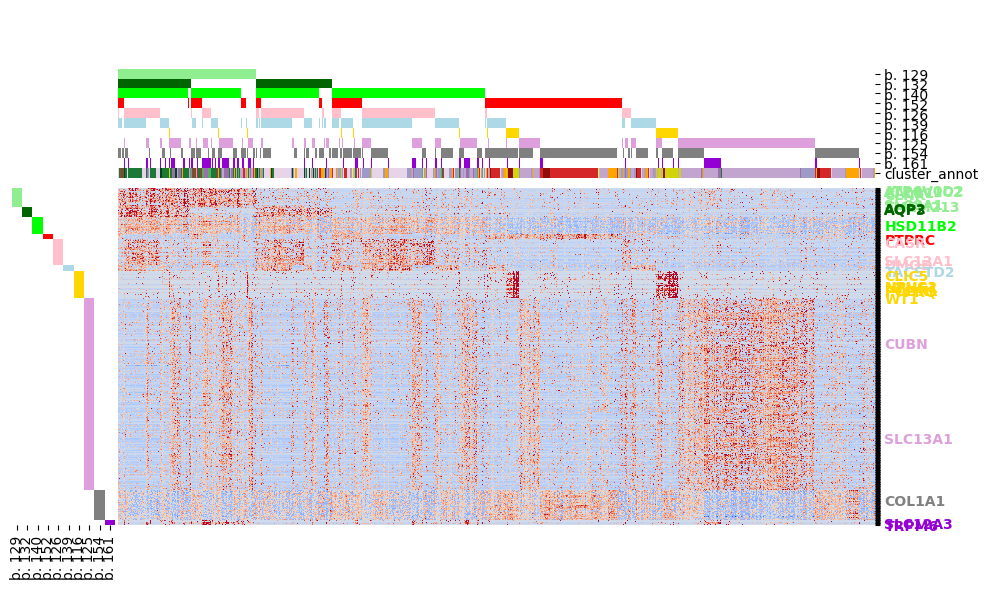

In [114]:
i = [129, 132, 140, 152, 126, 139, 116, 125, 154, 161] # 125 121
#i = [129, 152, 126, 116, 125, 154]
bic_colors = [marker_color_dict[bic_to_marker[bic_id]] for bic_id in i]
b = consensus_biclusters.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z.index)))

g, sample_order, (row_colors, col_colors) = draw_heatmap2(exprs_z, b,
                    annot = annot.loc[:,["cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= bic_colors,#"black",
              figsize = (10,6), 
              dendrogram_ratio=(0.0,0.1),
              colors_ratio=(0.02/10*6, 0.02),
              bic_prefix = "b. ",
              legend_n_cols=0,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
                    cluster_rows=False,
                    highlight_row_labels=marker_genes
             )


ytick_labels = [label.get_text() for label in g.ax_heatmap.get_yticklabels()]
new_ytick_labels = ["" if label not in marker_genes else label for label in ytick_labels]
g.ax_heatmap.set_yticklabels(new_ytick_labels)

ax = g.ax_heatmap
#ax.set_ylabel("")
#ax.set_xlabel("ANCA spots (n=%s)"%exprs_z.shape[1])
ax.set_xlabel("")

plt.savefig("ST_results/FigSX_Detected_in_ANCA.biclusters_with_markers.png",dpi = 600)
for bic_id in b.index:
    print(str(bic_id)+"\t"+bic_to_marker[bic_id]+"\t"," ".join(sorted(b.loc[bic_id,"genes"])))

data = g.data2d
plt.show()



In [34]:
bm = best_matches.loc[best_matches["classification"]=="cluster_annot",:]
bm

bm_id       ARI    weight  adj_pval is_enriched  \
CNT/PC                        138  0.121241  0.017281  0.000153        True   
Vasculature                   130  0.245018   0.06736  0.000462        True   
PT                            125  0.291878  0.269906  0.001654        True   
PT/DCT                        161  0.259588  0.048128  0.000597        True   
LOH                           126   0.38299  0.157391  0.001295        True   
Normal glomerular             116  0.731898  0.047106  0.000443        True   
CNT/PC/IC                     129   0.41103  0.090402  0.000866        True   
Inflamed tubulointerstitial   148  0.340497  0.130726  0.001225        True   
DCT/CNT                       161  0.104933  0.010871  0.000195        True   
Inflamed glomerular           116   0.22819  0.028152  0.000241        True   
PT/LOH                        180  0.426239  0.117346  0.000866        True   
Tubulointerstitial            123   0.05534   0.01533  0.000248        True   

                                                                       samples  \
CNT/PC                       {GTGATCAAGCGTGCAC-1_V6_A, TCGGGAACGTGCCTAG-1_V...   
Vasculature                  {ACCCGGTTACACTTCC-1_V6_B, GAGCGAGGGAGTACCG-1_V...   
PT                           {CTTTAGGAACACTGTT-1_V5_D, CTCGAGGTCGAACAGT-1_V...   
PT/DCT                       {CCCGTTTCGCAGATGT-1_V5_C, ACATCGATCGTTTACC-1_V...   
LOH                          {CCCGTTTCGCAGATGT-1_V5_C, TTGAGAGTACTGCTAA-1_V...   
Normal glomerular            {ATAAAGGCTCGGTCGT-1_V3_C, GAGCGAGGGAGTACCG-1_V...   
CNT/PC/IC                    {CGTATTAAGAGATCTA-1_V1_D, TGCTAAGTGTCTATTT-1_V...   
Inflamed tubulointerstitial  {ATAAACGGACCCGTAA-1_V3_C, AATCTGGCTTTCTAGT-1_V...   
DCT/CNT                      {CCCGTTTCGCAGATGT-1_V5_C, ACATCGATCGTTTACC-1_V...   
Inflamed glomerular          {ATAAAGGCTCGGTCGT-1_V3_C, GAGCGAGGGAGTACCG-1_V...   
PT/LOH                       {CTTTAGGAACACTGTT-1_V5_D, TTGAGAGTACTGCTAA-1_V...   
Tubulointerstitial           {GTCTGTAGGTTGAACA-1_V4_B, TCCGCTTATCCCATTA-1_V...   

                            n_samples classification  
CNT/PC                            516  cluster_annot  
Vasculature                       391  cluster_annot  
PT                               4028  cluster_annot  
PT/DCT                           1485  cluster_annot  
LOH                              2692  cluster_annot  
Normal glomerular                 632  cluster_annot  
CNT/PC/IC                        1964  cluster_annot  
Inflamed tubulointerstitial      2024  cluster_annot  
DCT/CNT                          1485  cluster_annot  
Inflamed glomerular               632  cluster_annot  
PT/LOH                           1884  cluster_annot  
Tubulointerstitial                719  cluster_annot

	Jaccard similarities for 6 features computed in 0.00 s.


Text(170.3573232323232, 0.5, 'bicluster overlap (Jaccard similarity)')

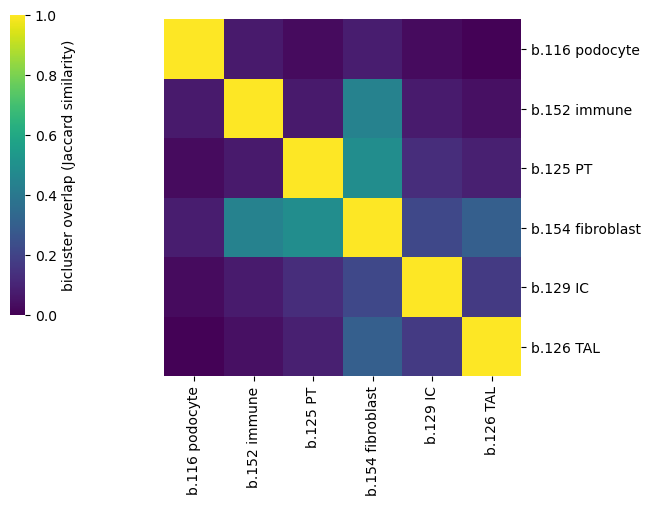

In [19]:
binary_representation = {}
N = exprs_z.shape[1]
for i in b.index.values:
    x = np.zeros(N)
    s_ndx = list(b.loc[i,"sample_indexes"])
    x[s_ndx] = 1
    binary_representation[i] = x
binary_representation = pd.DataFrame.from_dict(binary_representation)
binary_representation.index = data.columns.values
from unpast.utils.method import get_similarity_jaccard
similarity = get_similarity_jaccard(binary_representation,verbose = True)
g = sns.clustermap(similarity,
                   figsize=(5,5),
                   cbar_pos=(-0.1, 0.2, 0.03, 0.6),
               cmap="viridis",
              vmin=0,
               vmax =1,
               #annot =  True
              )
g.ax_col_dendrogram.set_visible(False)
g.ax_row_dendrogram.set_visible(False)
ylabels = g.ax_heatmap.get_yticklabels()
for l in ylabels:
    bic_id = l.get_text()
    l.set_text("b."+str(bic_id)+" "+bic_to_marker[int(bic_id)])
g.ax_heatmap.set_yticklabels(ylabels, rotation=0)
g.ax_heatmap.set_xticklabels(ylabels, rotation=90)
g.cax.set_ylabel("bicluster overlap (Jaccard similarity)")


### how many compartments per spot? 

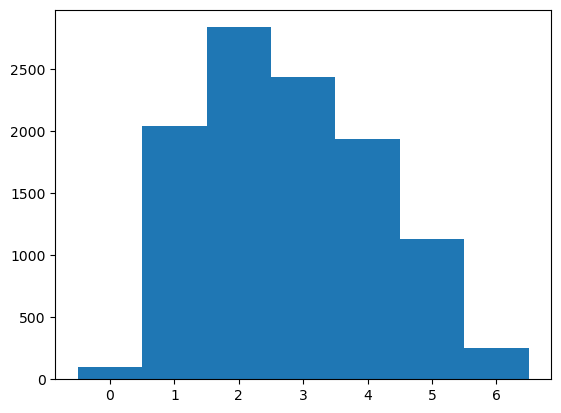

In [21]:
df_spots = pd.DataFrame(np.zeros((len(marker_order),exprs_z.shape[1])),
                       index = marker_order,
                       columns= exprs_z.columns)
for bic_id in  [129, 132, 140, 152, 126, 139, 116, 125, 154, 161]:
    marker = bic_to_marker [bic_id]
    spots = sorted(consensus_biclusters.loc[bic_id, "samples"])
    df_spots.loc[marker,spots] = 1
# two biclusters correspond to PT, 125 and 121
bic_id= 121
marker = bic_to_marker [bic_id]
spots = sorted(consensus_biclusters.loc[bic_id, "samples"])
df_spots.loc[marker,spots] = 1

tmp = plt.hist(df_spots.sum(), range = [-0.5,6.5], bins = 7) 

In [22]:
df_spots.sum()[df_spots.sum()==1].shape[0]

2042

In [23]:
df_spots.sum().mean()

2.8036792715785563

## plot biomarker expression for clusters 

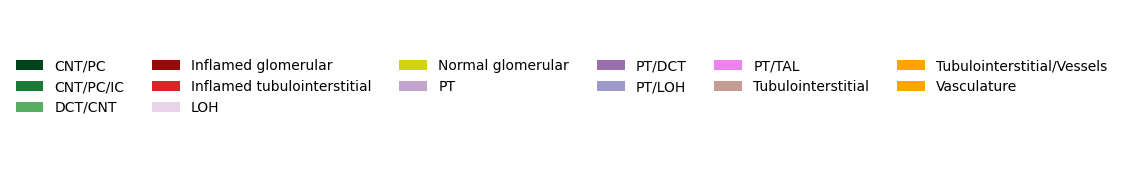

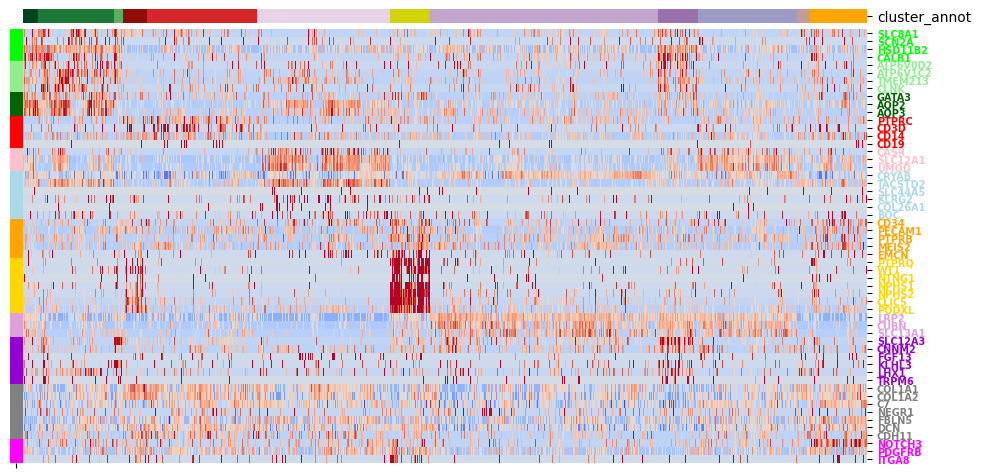

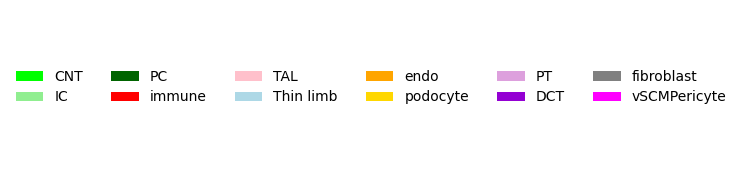

In [106]:
import seaborn as sns
from matplotlib.patches import Patch


sample_order = exprs_z.columns.values
cols = ["cluster_annot"]
annotation = annot.loc[:,:].copy()
col_colors = annotation.loc[:,cols]
cluster_columns = True
no_cbar = True

for col in reversed(cols):
    col_color_map = color_dict[col]
    col_colors[col] = col_colors[col].apply(lambda x: col_color_map[x])
    for subt in list(col_color_map.keys()):
        subt_samples = annotation.loc[annotation[col] == subt, :].index
        if cluster_columns:
            new_sample_order = [
                x for x in sample_order if x not in subt_samples
            ] + [x for x in sample_order if x in subt_samples]
            sample_order = new_sample_order

            
m_colors = []
feature_order = []
for m in marker_order:
    feature_order += markers[m]
    c = marker_color_dict[m]
    m_colors+=[c]*len(markers[m])
m_colors = pd.Series(m_colors, index=feature_order)



# Number of columns in the legend
n_cols = 6
# Create legend elements
legend_elements = [Patch(facecolor=color, label=label) for label, color in color_dict["cluster_annot"].items()]
# Plot an empty figure and add the legend
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
ax.legend(handles=legend_elements, ncol=n_cols, loc='center', frameon=False)
plt.savefig("ST_results/FigSX_ST_ANCA_compartments.pdf")
plt.show()

g = sns.clustermap(
        exprs_z.loc[feature_order, sample_order],
        figsize=(10,5),
        col_cluster=False,
        row_cluster=False,
        dendrogram_ratio=(0.01,0.01),
        colors_ratio=(0.03/10*5,0.03),
        cmap=sns.color_palette("coolwarm", as_cmap=True),
        vmin=-3,
        vmax=3,
        xticklabels=False,
        yticklabels=True,
        col_colors=col_colors,
        row_colors=m_colors,
    )
ax = g.ax_heatmap
#ax.set_ylabel("")
#ax.set_xlabel("ANCA spots (n=%s)"%exprs_z.shape[1])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
# g.cax.set_position([.10, .2, .03, .45])
# from https://stackoverflow.com/questions/47350879/seaborn-clustermap-subplots-adjust-cancels-colour-bar-relocation
dendro_box = g.ax_row_dendrogram.get_position()
dendro_box.x0 = (dendro_box.x0 + 2 * dendro_box.x1) / 3
g.cax.set_position(dendro_box)
# Move the ticks to the left (https://stackoverflow.com/a/36939552/1878788)
g.cax.yaxis.set_ticks_position("left")

if no_cbar:
        g.ax_cbar.set_visible(False)
        
highlight_row_labels = marker_genes # marker genes
for row_tick in ax.get_yticklabels():
    if row_tick.get_text() in highlight_row_labels:
        
        row_tick.set_weight("bold")
        for m_id in marker_order:
            if row_tick.get_text() in markers[m_id]:
                row_tick.set_color(marker_color_dict[m_id])
plt.savefig("ST_results/FigSX_ST_ANCA_biomarkers.png", dpi=600)
plt.show()
# Number of columns in the legend
n_cols = 6
# Create legend elements
legend_elements = []
for label in marker_order:
    color = marker_color_dict[label]
    legend_elements.append(Patch(facecolor=color, label=label))
# Plot an empty figure and add the legend
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
ax.legend(handles=legend_elements, ncol=n_cols, loc='center', frameon=False)
#plt.savefig("ST_results/FigSX_ST_ANCA_bic_color_legend.svg")
plt.show()

In [108]:
g = "PECAM1"
consensus_biclusters[consensus_biclusters['genes'].apply(lambda x: g in x)]

Empty DataFrame
Columns: [SNR, n_genes, n_samples, genes, samples, genes_up, genes_down, gene_indexes, sample_indexes, direction, detected_n_times, ids]
Index: []

/home/olga/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


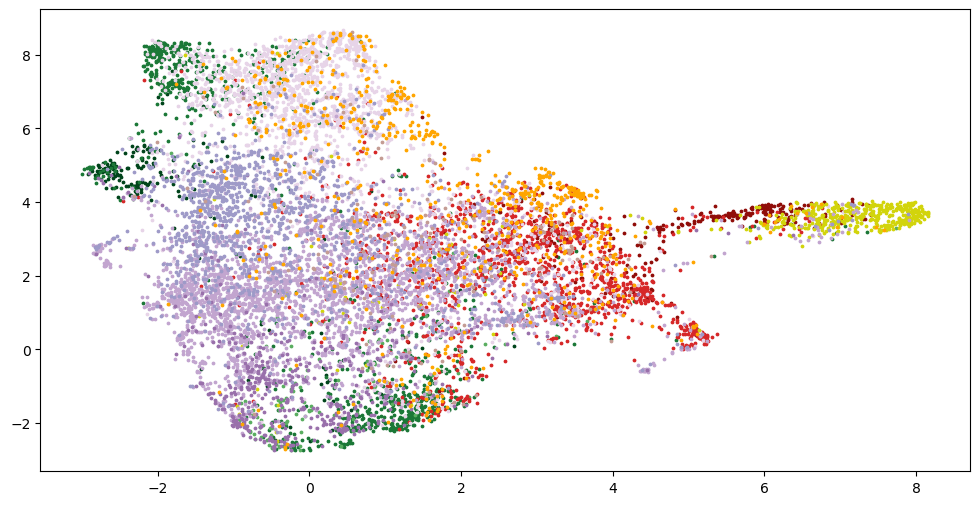

In [25]:
import umap
import seaborn as sns

col = "cluster_annot"

# UMAP dimensionality reduction
reducer = umap.UMAP(random_state=42,n_neighbors=5,min_dist=0.1)
embedding = pd.DataFrame(data=reducer.fit_transform(exprs_z.loc[feature_order, sample_order].T),
                         index = sample_order,
                         columns = [1,2])

# Create a scatter plot
plt.figure(figsize=(12, 6))
for category, color in color_dict[col].items():
    samples = annot.loc[annot[col]==category,:].index.values
    plt.scatter(embedding.loc[samples, 1], embedding.loc[samples, 2], label=category, color=color, s=3)


plt.show()


/home/olga/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


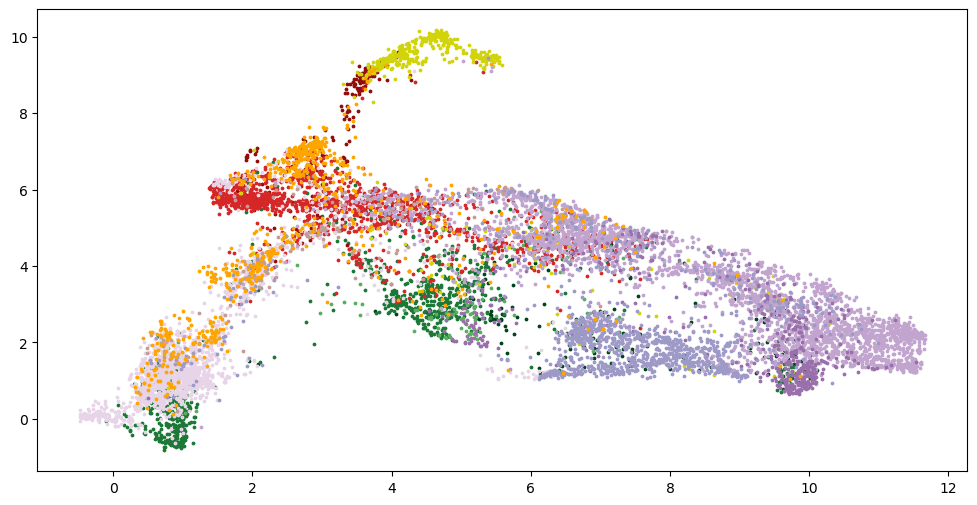

In [26]:
col = "cluster_annot"

# UMAP dimensionality reduction
reducer = umap.UMAP(random_state=42,n_neighbors=5,min_dist=0.1,n_components=2)
embedding = pd.DataFrame(data=reducer.fit_transform(data.T),
                         index = data.columns,
                         columns = [1,2])

# Create a scatter plot
plt.figure(figsize=(12, 6))
for category, color in color_dict[col].items():
    samples = annot.loc[annot[col]==category,:].index.values
    plt.scatter(embedding.loc[samples, 1], embedding.loc[samples, 2], label=category, color=color, s=3)


plt.show()

# ANCA + CTRL

* External: 12355(CTRL)
* Internal: 10763(ANCA)+9065(CTRL)=19828 

In [27]:
outfile = out_dir+"/"+basename+".consensus_seed="+str(analysis_seed)
outfile += ".biclusters.tsv" 
from unpast.utils.io import read_bic_table
consensus_biclusters = read_bic_table(outfile)

In [28]:
annot2 = pd.read_csv("data/ST/GSE250138_anca_and_ctrl_samples_processed.obs.tsv",sep  ="\t",index_col=0)
annot2 = annot2.loc[annot2["Cohort"]=='Internal',:]
annot2.head(3)

/tmp/ipykernel_336197/2163891334.py:1: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  annot2 = pd.read_csv("data/ST/GSE250138_anca_and_ctrl_samples_processed.obs.tsv",sep  ="\t",index_col=0)


in_tissue  array_row  array_col   Sample  \
AAACAATCTACTAGCA-1_CTRL1_C-0        1.0        3.0       43.0  CTRL1_C   
AAACAGAGCGACTCCT-1_CTRL1_C-0        1.0       14.0       94.0  CTRL1_C   
AAACCCGAACGAAATC-1_CTRL1_C-0        1.0       45.0      115.0  CTRL1_C   

                              n_genes_by_counts  log1p_n_genes_by_counts  \
AAACAATCTACTAGCA-1_CTRL1_C-0               1514                 7.323171   
AAACAGAGCGACTCCT-1_CTRL1_C-0               2216                 7.703910   
AAACCCGAACGAAATC-1_CTRL1_C-0                977                 6.885510   

                              total_counts  log1p_total_counts  \
AAACAATCTACTAGCA-1_CTRL1_C-0        1955.0            7.578657   
AAACAGAGCGACTCCT-1_CTRL1_C-0        3248.0            8.086103   
AAACCCGAACGAAATC-1_CTRL1_C-0        1174.0            7.069024   

                              pct_counts_in_top_50_genes  \
AAACAATCTACTAGCA-1_CTRL1_C-0                   11.764706   
AAACAGAGCGACTCCT-1_CTRL1_C-0                   11.052956   
AAACCCGAACGAAATC-1_CTRL1_C-0                   13.884157   

                              pct_counts_in_top_100_genes  ...  \
AAACAATCTACTAGCA-1_CTRL1_C-0                    18.005115  ...   
AAACAGAGCGACTCCT-1_CTRL1_C-0                    17.333744  ...   
AAACCCGAACGAAATC-1_CTRL1_C-0                    22.402044  ...   

                              region_Medulla_score  region_Papilla_score  \
AAACAATCTACTAGCA-1_CTRL1_C-0                   NaN                   NaN   
AAACAGAGCGACTCCT-1_CTRL1_C-0                   NaN                   NaN   
AAACCCGAACGAAATC-1_CTRL1_C-0                   NaN                   NaN   

                              leiden_2  cluster_annot_broad  annot_v1  \
AAACAATCTACTAGCA-1_CTRL1_C-0       NaN              Tubules       NaN   
AAACAGAGCGACTCCT-1_CTRL1_C-0       NaN              Tubules       NaN   
AAACCCGAACGAAATC-1_CTRL1_C-0       NaN    Normal glomerular       NaN   

                              count_v1  annot_v2 count_v2 batch    Cohort  
AAACAATCTACTAGCA-1_CTRL1_C-0       NaN       NaN      NaN     0  Internal  
AAACAGAGCGACTCCT-1_CTRL1_C-0       NaN       NaN      NaN     0  Internal  
AAACCCGAACGAAATC-1_CTRL1_C-0       NaN       NaN      NaN     0  Internal  

[3 rows x 38 columns]

In [29]:
import seaborn as sns
slides = sorted(set(annot2["Sample"].values))
sl_colors = sns.color_palette("colorblind",len(slides)).as_hex()
color_dict["Sample"] = dict(zip(slides,sl_colors))

color_dict["Condition"] = {'ANCA':"pink", 'CTRL':"lightgreen"} 

In [30]:
set(annot2.loc[annot2["Condition"]=="CTRL","Sample"].values)


{'CTRL1_B', 'CTRL1_C', 'CTRL1_D'}

In [31]:
#exprs_file2 = "data/ST/GSE250138_anca_and_ctrl_samples_processed.tsv"
#exprs2 = pd.read_csv(exprs_file2,sep="\t",index_col = 0)
#exprs2.shape

In [32]:
#exprs2=exprs2.loc[:,annot2.index]
#exprs2.columns = ["-".join(x.split("-")[:2]) for x in exprs2.columns]
#exprs2.to_csv("data/ST/GSE250138_External_ANCA_CTRL.exprs.tsv", sep = "\t")
#annot2.index =["-".join(x.split("-")[:2]) for x in annot2.index]
#annot2.to_csv("data/ST/GSE250138_External_ANCA_CTRL.annot.tsv", sep = "\t")

In [33]:
exprs2 = pd.read_csv("data/ST/GSE250138_External_ANCA_CTRL.exprs.tsv", sep = "\t",index_col=0)
annot2 = pd.read_csv("data/ST/GSE250138_External_ANCA_CTRL.annot.tsv", sep = "\t",index_col=0)

In [34]:
# filter and z-score transform input matrix, limit z-scores to [-3,3]
exprs_z2 = prepare_input_matrix(exprs2.loc[:,annot2.index], min_n_samples=5,ceiling=3)
exprs2 = 0
exprs_z2.shape

(15305, 19828)

In [35]:
#annot2 = pd.read_csv("data/ST/GSE250138_anca_and_ctrl_samples_processed.obs.tsv",sep  ="\t",index_col=0)
#annot2 = annot2.loc[:,["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]] # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
#annot2 = annot2.fillna("NA")
annot2.index =["-".join(x.split("-")[:2]) for x in annot2.index]
annot2.head(3)

in_tissue  array_row  array_col   Sample  \
AAACAATCTACTAGCA-1_CTRL1_C        1.0        3.0       43.0  CTRL1_C   
AAACAGAGCGACTCCT-1_CTRL1_C        1.0       14.0       94.0  CTRL1_C   
AAACCCGAACGAAATC-1_CTRL1_C        1.0       45.0      115.0  CTRL1_C   

                            n_genes_by_counts  log1p_n_genes_by_counts  \
AAACAATCTACTAGCA-1_CTRL1_C               1514                 7.323171   
AAACAGAGCGACTCCT-1_CTRL1_C               2216                 7.703910   
AAACCCGAACGAAATC-1_CTRL1_C                977                 6.885510   

                            total_counts  log1p_total_counts  \
AAACAATCTACTAGCA-1_CTRL1_C        1955.0            7.578657   
AAACAGAGCGACTCCT-1_CTRL1_C        3248.0            8.086103   
AAACCCGAACGAAATC-1_CTRL1_C        1174.0            7.069024   

                            pct_counts_in_top_50_genes  \
AAACAATCTACTAGCA-1_CTRL1_C                   11.764706   
AAACAGAGCGACTCCT-1_CTRL1_C                   11.052956   
AAACCCGAACGAAATC-1_CTRL1_C                   13.884157   

                            pct_counts_in_top_100_genes  ...  \
AAACAATCTACTAGCA-1_CTRL1_C                    18.005115  ...   
AAACAGAGCGACTCCT-1_CTRL1_C                    17.333744  ...   
AAACCCGAACGAAATC-1_CTRL1_C                    22.402044  ...   

                            region_Medulla_score  region_Papilla_score  \
AAACAATCTACTAGCA-1_CTRL1_C                   NaN                   NaN   
AAACAGAGCGACTCCT-1_CTRL1_C                   NaN                   NaN   
AAACCCGAACGAAATC-1_CTRL1_C                   NaN                   NaN   

                            leiden_2  cluster_annot_broad  annot_v1  count_v1  \
AAACAATCTACTAGCA-1_CTRL1_C       NaN              Tubules       NaN       NaN   
AAACAGAGCGACTCCT-1_CTRL1_C       NaN              Tubules       NaN       NaN   
AAACCCGAACGAAATC-1_CTRL1_C       NaN    Normal glomerular       NaN       NaN   

                            annot_v2 count_v2 batch    Cohort  
AAACAATCTACTAGCA-1_CTRL1_C       NaN      NaN     0  Internal  
AAACAGAGCGACTCCT-1_CTRL1_C       NaN      NaN     0  Internal  
AAACCCGAACGAAATC-1_CTRL1_C       NaN      NaN     0  Internal  

[3 rows x 38 columns]

In [36]:
annot_ctrl = annot2.loc[annot2["Condition"]=="CTRL",:]
annot_anca = annot2.loc[annot2["Condition"]=="ANCA",:]
exprs_z2.loc[:,annot_anca.index.values]

AAACGAGACGGTTGAT-1_V5_A  AAATAGGGTGCTATTG-1_V5_A  \
SAMD11                 -0.364664                -0.364664   
NOC2L                  -0.592057                -0.592057   
KLHL17                 -0.277926                -0.277926   
PLEKHN1                -0.184704                -0.184704   
PERM1                  -0.092735                -0.092735   
...                          ...                      ...   
TBL1Y                  -0.119742                -0.119742   
USP9Y                  -0.182086                -0.182086   
DDX3Y                   2.320927                -0.319649   
TMSB4Y                 -0.051177                -0.051177   
KDM5D                   2.028074                -0.480459   

         AAATTTGCGGGTGTGG-1_V5_A  AACAATACATTGTCGA-1_V5_A  \
SAMD11                 -0.364664                -0.364664   
NOC2L                  -0.592057                -0.592057   
KLHL17                 -0.277926                -0.277926   
PLEKHN1                -0.184704                -0.184704   
PERM1                  -0.092735                -0.092735   
...                          ...                      ...   
TBL1Y                  -0.119742                -0.119742   
USP9Y                  -0.182086                -0.182086   
DDX3Y                  -0.319649                -0.319649   
TMSB4Y                 -0.051177                -0.051177   
KDM5D                   1.099601                 1.883136   

         AACGGACGTACGTATA-1_V5_A  AACGGCCATCTCCGGT-1_V5_A  \
SAMD11                 -0.364664                -0.364664   
NOC2L                  -0.592057                -0.592057   
KLHL17                 -0.277926                -0.277926   
PLEKHN1                 3.000000                -0.184704   
PERM1                  -0.092735                -0.092735   
...                          ...                      ...   
TBL1Y                  -0.119742                -0.119742   
USP9Y                  -0.182086                -0.182086   
DDX3Y                  -0.319649                 2.487295   
TMSB4Y                 -0.051177                -0.051177   
KDM5D                   1.016353                 1.300947   

         AACGTGCGAAAGTCTC-1_V5_A  AACTCTCAGTGTGCTC-1_V5_A  \
SAMD11                 -0.364664                -0.364664   
NOC2L                  -0.592057                 1.303029   
KLHL17                 -0.277926                -0.277926   
PLEKHN1                -0.184704                -0.184704   
PERM1                  -0.092735                -0.092735   
...                          ...                      ...   
TBL1Y                  -0.119742                -0.119742   
USP9Y                  -0.182086                -0.182086   
DDX3Y                   3.000000                 3.000000   
TMSB4Y                 -0.051177                -0.051177   
KDM5D                   1.914692                -0.480459   

         AAGAGCTCTTTATCGG-1_V5_A  AAGAGGCATGGATCGC-1_V5_A  ...  \
SAMD11                 -0.364664                 1.262693  ...   
NOC2L                  -0.592057                 0.707788  ...   
KLHL17                  2.875550                 3.000000  ...   
PLEKHN1                -0.184704                 3.000000  ...   
PERM1                  -0.092735                -0.092735  ...   
...                          ...                      ...  ...   
TBL1Y                  -0.119742                -0.119742  ...   
USP9Y                  -0.182086                -0.182086  ...   
DDX3Y                   2.474345                -0.319649  ...   
TMSB4Y                 -0.051177                -0.051177  ...   
KDM5D                   3.000000                -0.480459  ...   

         TTGCCGCTTTCTAGTA-1_V5_D  TTGCGTGTGTAGGCAT-1_V5_D  \
SAMD11                 -0.364664                -0.364664   
NOC2L                  -0.592057                -0.592057   
KLHL17                 -0.277926                -0.277926   
PLEKHN1                -0.184704        

In [116]:
set(annot_ctrl["Sample"].values)

{'CTRL1_B', 'CTRL1_C', 'CTRL1_D'}

In [37]:
exprs_anca_z = exprs_z2.loc[:,annot_anca.index.values]
exprs_ctrl_z = exprs_z2.loc[:,annot_ctrl.index.values]
exprs_ctrl_z.shape

(15305, 9065)

In [38]:
from unpast.utils.method import cluster_samples, update_bicluster_data

def make_similar_biclusters(bics, # discovered biclsuters
                            exprs_z, # new expression data
                            min_snr = 0.5, # minimal SNR of genes  
                            seed = 42,
                            min_n_genes = 2,
                            min_n_samples = 5,
                           ):
    new_bics = {} # biclusters in new expression data similar to known biclusters
    gene_sets_stats = {}
    all_samples = set(exprs_z.columns)
    for bic_id in bics.index.values:
        g = bics.loc[bic_id,"genes"]
        
        gene_sets_stats[bic_id] = {"genes":g,"n_genes":len(g)}
        # keep only genes presenting in expression data
        g = sorted(g.intersection(set(exprs_z.index.values)))
        gene_sets_stats[bic_id].update({"genes_measured":g,"n_genes_measured":len(g)})
        if len(g)>=min_n_genes:
            # only make biclusters for >2 genes bicluster will not be constructed
            e = exprs_z.loc[g, :]
            b = cluster_samples(
                            e.T,
                            min_n_samples=5,
                            seed=seed
                            )
            # continue only if bicluster includes samples
            if 'sample_indexes' in b.keys() and len(b['sample_indexes'])>= min_n_samples:
                # remove genes with abs.SNR < min_snr
                samples = exprs_z.columns[sorted(b['sample_indexes'])]
                bg_samples = sorted(all_samples.difference(samples))
                m = exprs_z.loc[g,samples].mean(axis=1) - exprs_z.loc[g,bg_samples].mean(axis=1)
                s = exprs_z.loc[g,samples].std(axis=1) + exprs_z.loc[g,bg_samples].std(axis=1)
                snr = m/s
                # update gene sets
                g_up = set(snr[snr>min_snr].index.values)
                g_down = set(snr[snr<-min_snr].index.values)
                g = g_up | g_down
                g = sorted(set(snr[np.abs(snr)>min_snr].index.values))
                e = exprs_z.loc[g, :]
                b["genes"] = set(g)
                b["n_genes"] = len(b["genes"])
                if len(g_up)>0:
                    b["direction"] = "UP"
                    if len(g_down)>0:
                        b["direction"] = "BOTH"
                elif len(g_down)>0:
                        b["direction"] = "DOWN"
                # update and bicluster data
                b = update_bicluster_data(b, e)
                # gene indexes in complete expression matrix
                b['gene_indexes'] = set([i for i,val in enumerate(exprs_z.index.values) if val in b['genes'] ])
                new_bics[bic_id] = b
                # update statistics
                gene_sets_stats[bic_id].update({"genes2":b["genes"],"n_genes2":b["n_genes"]})
                gene_sets_stats[bic_id].update({"SNR":bics.loc[bic_id,"SNR"],"SNR2":b["SNR"]})
            
    new_bics = pd.DataFrame.from_dict(new_bics).T
    new_bics = new_bics.loc[new_bics["n_genes"]>=min_n_genes,:]
    new_bics = new_bics.loc[new_bics["n_samples"]>=min_n_samples,:]
    gene_sets_stats = pd.DataFrame.from_dict(gene_sets_stats).T
    return new_bics, gene_sets_stats

In [39]:
anca_bics, anca_gs_stat = make_similar_biclusters(consensus_biclusters,
                                                    exprs_anca_z,
                                                    seed=analysis_seed,
                                                  min_snr = 0)

In [40]:
ctrl_bics, ctrl_gs_stat = make_similar_biclusters(consensus_biclusters,
                                                    exprs_ctrl_z,
                                                    seed=analysis_seed,
                                                 min_snr = 0)

ctrl_gs_stat#.loc[ctrl_gs_stat[""],:]

genes n_genes        genes_measured n_genes_measured  \
0          {CYP1A2, GJA8}       2              [CYP1A2]                1   
1         {WDR87, FBXO47}       2                    []                0   
2            {SI, OR5B12}       2                    []                0   
3        {ARL13A, GUCY2F}       2                    []                0   
4           {OR2C3, HAS1}       2                [HAS1]                1   
..                    ...     ...                   ...              ...   
182   {ATP6V1B2, LAMTOR1}       2   [ATP6V1B2, LAMTOR1]                2   
183     {TSPAN2, NES, F3}       3     [F3, NES, TSPAN2]                3   
184        {CHD4, RNF149}       2        [CHD4, RNF149]                2   
185  {NDRG2, HOXB3, DDR1}       3  [DDR1, HOXB3, NDRG2]                3   
186  {GSTO1, LAMP2, BRI3}       3  [BRI3, GSTO1, LAMP2]                3   

                   genes2 n_genes2       SNR      SNR2  
0                     NaN      NaN       NaN       NaN  
1                     NaN      NaN       NaN       NaN  
2                     NaN      NaN       NaN       NaN  
3                     NaN      NaN       NaN       NaN  
4                     NaN      NaN       NaN       NaN  
..                    ...      ...       ...       ...  
182   {ATP6V1B2, LAMTOR1}        2  0.992527   1.15218  
183     {TSPAN2, NES, F3}        3  0.969759  1.026834  
184        {CHD4, RNF149}        2  0.933791  1.067607  
185  {NDRG2, HOXB3, DDR1}        3  0.879403  0.780143  
186  {GSTO1, LAMP2, BRI3}        3  0.775525  0.959956  

[187 rows x 8 columns]

### Selected biclusters

* infrequent in CTRL
* expression is higher in ANCA than in CTRL
* SNR >1.2 in ANCA

In [41]:
d1 = anca_bics.loc[:,["n_samples","SNR","genes", "n_genes"]]
d1.columns = "ANCA_"+d1.columns 
d2 = ctrl_bics.loc[:,["n_samples","SNR"]]
d2.columns = "CTRL_"+d2.columns 

compared_bics = pd.concat([d1,d2],axis=1).fillna(0)


for bic_id in compared_bics.index.values:
    compared_bics.loc[bic_id,"mean_z_ANCA"] = exprs_z2.loc[sorted(anca_bics.loc[bic_id,"genes"]),
                      sorted(anca_bics.loc[bic_id,"samples"])].stack().dropna().mean()
    try:
        compared_bics.loc[bic_id,"mean_z_CTRL"] = exprs_z2.loc[sorted(ctrl_bics.loc[bic_id,"genes"]),
                      sorted(ctrl_bics.loc[bic_id,"samples"])].stack().dropna().mean()
    except:
        pass
compared_bics["mean_z_diff"] = compared_bics["mean_z_ANCA"] -  compared_bics["mean_z_CTRL"]
compared_bics = compared_bics.sort_values(by = "mean_z_diff",ascending = False)
# 
compared_bics = compared_bics.loc[compared_bics["ANCA_SNR"]>1.2,:].dropna()
compared_bics = compared_bics.loc[compared_bics["mean_z_ANCA"]>0.5,:]
compared_bics = pd.concat([compared_bics.loc[compared_bics["mean_z_diff"]>0.5,:],
                           compared_bics.loc[compared_bics["CTRL_n_samples"]<compared_bics["ANCA_n_samples"]/2,:]
                          ]).drop_duplicates(subset=["ANCA_SNR","CTRL_SNR","CTRL_n_samples","ANCA_n_samples"])
compared_bics = compared_bics.loc[compared_bics["ANCA_n_genes"]>2,:]
compared_bics

/tmp/ipykernel_336197/321987180.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  compared_bics = pd.concat([d1,d2],axis=1).fillna(0)


ANCA_n_samples  ANCA_SNR  \
120            1420  1.839932   
145            2502  1.512726   
146            4243  1.508671   
152            2895  1.442993   
147            3528  1.490958   
148            2428  1.466834   
142            2786  1.424478   
154            5000  1.415011   
151            3377  1.493645   
144            4267  1.488267   
150            4215  1.445583   
143            2848  1.299324   
141            2771  1.483144   
134            3082  1.201557   
130             392  1.630650   
168            1088  1.575521   
171            2462  1.277154   
135             893  1.362773   
127            2902  1.649851   
149            1265  1.244929   
159            1221  1.350392   
156            1605  1.219715   

                                            ANCA_genes  ANCA_n_genes  \
120  {ISG15, MX1, XAF1, OAS2, IFI44, OAS3, RSAD2, I...            10   
145  {IGKC, CD79A, DERL3, IGHG1, MZB1, JCHAIN, PIM2...            18   
146                    {LTF, NNMT, C3, SERPINA3, LCN2}             5   
152  {LSP1, CORO1A, LYZ, PTPRC, CD37, LIMD2, ARHGAP...             8   
147                {VSIG4, FCGR3A, CD163, HCLS1, C1QA}             5   
148              {LTB, TRBC2, RAC2, TRBC1, TRAC, CD52}             6   
142                              {PTGDS, CCL21, CCL19}             3   
154  {CD99, TPM2, BST2, STAB1, TYROBP, RNASE1, COL6...            42   
151                       {FCER1G, IL10RA, SPI1, CTSS}             4   
144                             {MS4A6A, CSF1R, ITGB2}             3   
150                      {CDH6, HAVCR1, SPON2, DLGAP1}             4   
143                  {S100A8, S100A9, SLC11A1, FCGR3A}             4   
141                         {IL7R, CXCR4, CD53, IKZF1}             4   
134                          {S100A9, SLC11A1, S100A8}             3   
130                                {ACTC1, ACTG2, DES}             3   
168                      {LILRA4, SPIB, TCL1A, NIBAN3}             4   
171                                    {FGA, FGB, FGG}             3   
135                           {HDC, CTSG, TPSB2, CPA3}             4   
127                                {DDX3Y, ZFY, KDM5D}             3   
149                               {TRPV5, CFTR, OLFM4}             3   
159                 {MKI67, TPX2, TROAP, TOP2A, UBE2C}             5   
156                    {HIST1H3G, HIST1H2AG, HIST1H3H}             3   

     CTRL_n_samples  CTRL_SNR  mean_z_ANCA  mean_z_CTRL  mean_z_diff  
120            1133  0.717403     1.539125     0.036784     1.502342  
145             526  0.792745     1.066201    -0.106994     1.173195  
146            1059  1.031917     1.073896    -0.074636     1.148532  
152             896  0.728677     1.121175     0.105887     1.015287  
147             836  1.023563     1.139102     0.163259     0.975843  
148             505  1.239981     1.196395     0.228424     0.967971  
142            3606  1.538390     1.144326     0.217263     0.927064  
154            3995  1.198144     0.735888    -0.182448     0.918335  
151             840  1.236277     1.169555     0.273605     0.895950  
144            1150  1.114298     1.138509     0.286714     0.851795  
150            2561  0.815268     0.908804     0.185107     0.723697  
143             623  1.765245     1.099207     0.485417     0.613790  
141             771  1.107706     1.173803     0.563605     0.610198  
134             623  2.302694     1.055719     0.734109     0.321610  
130             127  2.457985     1.364991     1.067669     0.297323  
168             176  2.867296     0.913430     0.714749     0.198681  
171             185  3.475029     0.942053     0.788583     0.153470  
135              75  1.841939     0.968975     0.843957     0.125017  
127            1421  1.502372     0.881316     0.824620     0.056695  
149             107  1.913231     1.109915     1.063718     0.046197  
159               5  2.885243     0.990500     1.603306    -0.612806  
156               7  4.120

In [42]:
compared_bics.sort_values(by = "ANCA_n_samples",ascending = False).index.values

array([154, 144, 146, 150, 147, 151, 134, 127, 152, 143, 142, 141, 145,
       171, 148, 156, 120, 149, 159, 168, 135, 130])

### IFNA response 

b.120: IFI27 IFI44 IFI44L IFI6 ISG15 MX1 OAS2 OAS3 RSAD2 XAF1


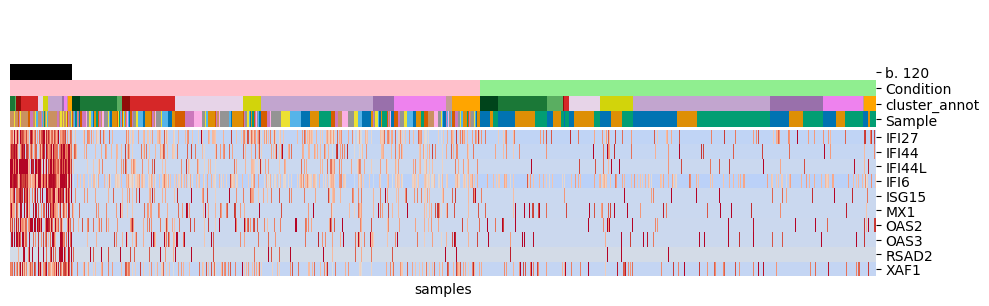

In [138]:
i = [120] # lymphoid cells
b = anca_bics.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot","Sample"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black",
              figsize = (10,3), 
              dendrogram_ratio=(0.0,0.2),
              colors_ratio=(0.06/10*3, 0.06),
              bic_prefix = "b. ",
              #legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = True,
              cluster_rows=False
             )

#plt.savefig("ST_results/Detected_in_ANCA.bic154.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))

### Lymphoid cells

b.148: CD52 LTB RAC2 TRAC TRBC1 TRBC2
b.152: ARHGAP45 CD37 CORO1A LIMD2 LSP1 LYZ PTPRC TMC8
b.141: CD53 CXCR4 IKZF1 IL7R
b.145: CD79A DERL3 FCRL5 IGHA1 IGHG1 IGHG2 IGHG3 IGHG4 IGHM IGKC IGLC1 IRF4 JCHAIN MZB1 PIM2 POU2AF1 TENT5C ZBP1


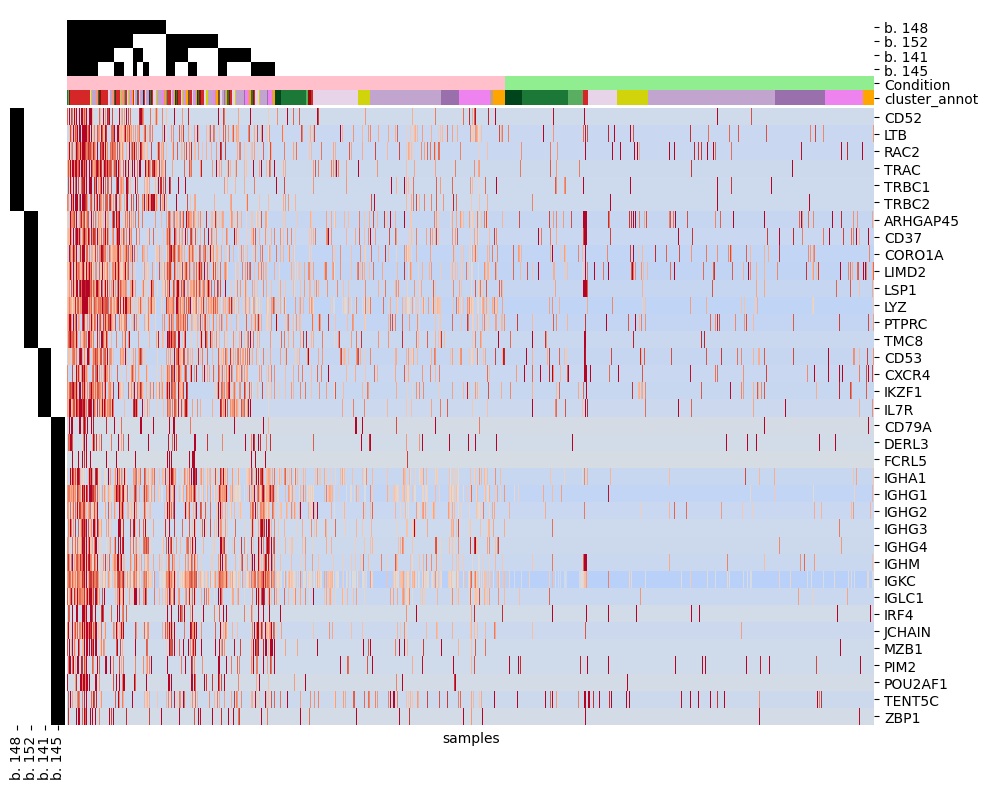

In [129]:
i = [148,152,141,145] # lymphoid cells
b = anca_bics.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))
"""
for bic_id in i:
    b.loc[bic_id,"samples"] = [ctrl_bics.loc[bic_id,"samples"] | anca_bics.loc[bic_id,"samples"]]
b["samples"] = b["samples"].apply(lambda x: x[0])
""" 
tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black",
              figsize = (10,8), 
              dendrogram_ratio=(0.0,0.01),
              colors_ratio=(0.02/10*8, 0.02),
              bic_prefix = "b. ",
              legend_n_cols=0,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
              cluster_rows=False
             )

#plt.savefig("ST_results/Detected_in_ANCA.bic154.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))
    
    
    

### Monocytes

In [119]:
"FCGR3A" in exprs_z2.index

True

b.144: CSF1R ITGB2 MS4A6A
b.147: C1QA CD163 FCGR3A HCLS1 VSIG4
b.151: CTSS FCER1G IL10RA SPI1


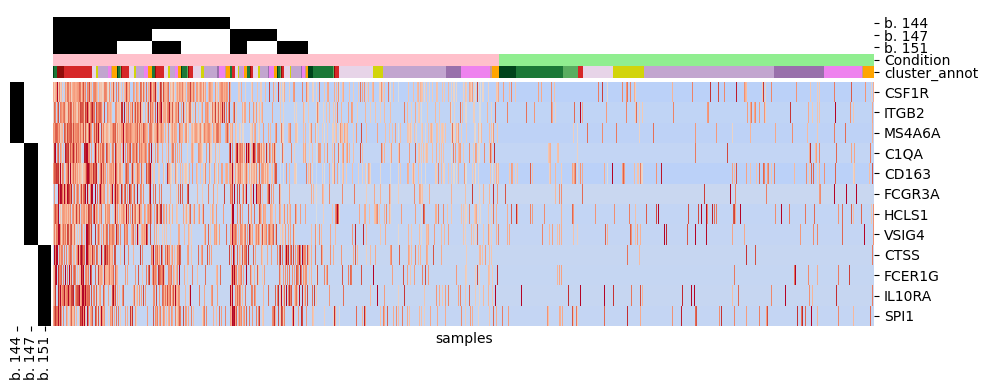

In [131]:
i = [144, 147, 151] #  monocytes
# 144 monocytes
# 147 FCGR3A,CD163,C1QA also monocytes
# 151 FCER1G IL10RA  also monocytes
# 143 macrophages
b = anca_bics.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black",
              figsize = (10,4), 
              dendrogram_ratio=(0.0,0.01),
              colors_ratio=(0.04/10*4, 0.04),
              bic_prefix = "b. ",
              legend_n_cols=0,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
              cluster_rows=False
             )

#plt.savefig("ST_results/Detected_in_ANCA.bic154.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))

### Fibroblasts and inflamed endothelium

b.157: FN1 POSTN
b.146: C3 LCN2 LTF NNMT SERPINA3
b.150: CDH6 DLGAP1 HAVCR1 SPON2
b.142: CCL19 CCL21 PTGDS


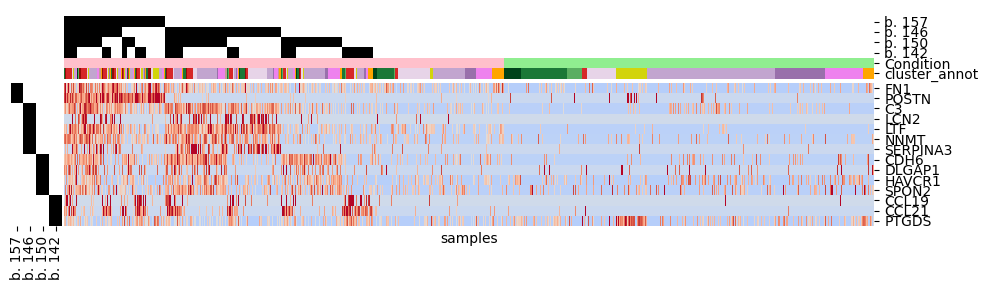

In [137]:
i = [157,146,150,142] 
# 157 fibroblasts
# 146 - some kind of epithelium and  C3
#? 150,142
b = anca_bics.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black",
              figsize = (10,3), 
              dendrogram_ratio=(0.0,0.01),
              colors_ratio=(0.05/10*3, 0.05),
              bic_prefix = "b. ",
              legend_n_cols=0,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
              cluster_rows=False
             )

#plt.savefig("ST_results/Detected_in_ANCA.bic154.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))

### fibroblasts?

* includes marker of fibroblast - COL1A1
* not similar to any Leiden cluster: ARI <= 0.08
* anti-corr with biculusters 161 (DCT), and 125 (PT), positively corr. with inflammation biclusters
* in CTRL, some genes are up-regulated only in vessels

In [47]:
consensus_biclusters.head(2)

SNR  n_genes  n_samples            genes  \
id                                                  
0   3.618431        2         36   {CYP1A2, GJA8}   
1   3.499520        2         22  {WDR87, FBXO47}   

                                              samples         genes_up  \
id                                                                       
0   {ACGCGCTACACAGGGT-1_V6_C, ACCGTGACCACGTGGG-1_V...   {CYP1A2, GJA8}   
1   {CATCGGACGGGTTAAT-1_V5_B, CTTTCTGTGCGGGCTT-1_V...  {WDR87, FBXO47}   

   genes_down    gene_indexes  \
id                              
0          {}    {980, 12607}   
1          {}  {15481, 13975}   

                                       sample_indexes direction  \
id                                                                
0   {3328, 8323, 4228, 6661, 6287, 9106, 8850, 590...        UP   
1   {2688, 5131, 8845, 1686, 8855, 9116, 4125, 438...        UP   

    detected_n_times                                                ids  
id                                                                       
0                  4  seed=403958_2 seed=441001_0 seed=885440_0 seed...  
1                  2                        seed=403958_3 seed=885440_2

b.154: ACTA2 AEBP1 AHNAK ARHGDIB ARPC1B BGN BST2 C1QB C1QC C1R C1S CAVIN1 CD99 COL1A1 COL3A1 COL6A2 EHBP1L1 EMILIN1 FSTL1 GGT5 HLA-DPA1 HLA-DPB1 HLA-F IFITM2 LAPTM5 LUM MARCKS MGP PLXND1 RNASE1 RNASET2 STAB1 TAGLN TGM2 TIMP1 TIMP2 TMSB4X TNC TPM2 TYROBP WIPF1 ZYX


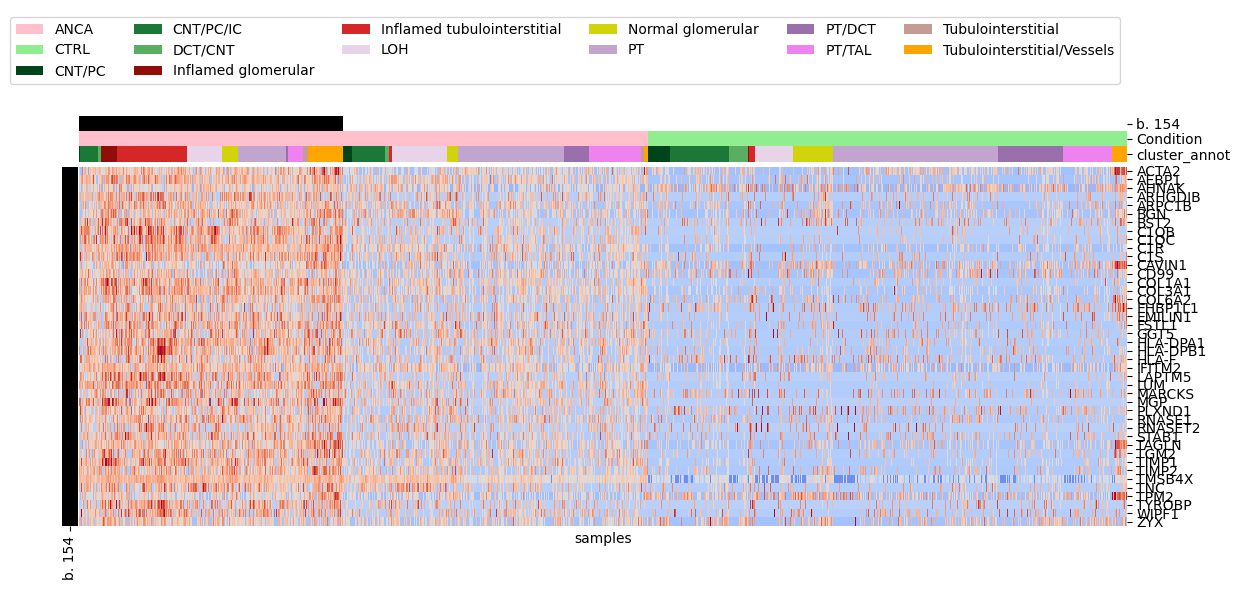

In [48]:
i = [154] 
# 154 some kind of macrophages (TYROBP, C1QC,C1QB) or fibroblasts (LUM,C1R)
b = anca_bics.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black",
              figsize = (12,6), 
              dendrogram_ratio=(0.0,0.2),
              colors_ratio=(0.03/12*6, 0.03),
              bic_prefix = "b. ",
              legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
              cluster_rows=False
             )

#plt.savefig("ST_results/Detected_in_ANCA.bic154.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))

### proliferation 

b.159: MKI67 TOP2A TPX2 TROAP UBE2C


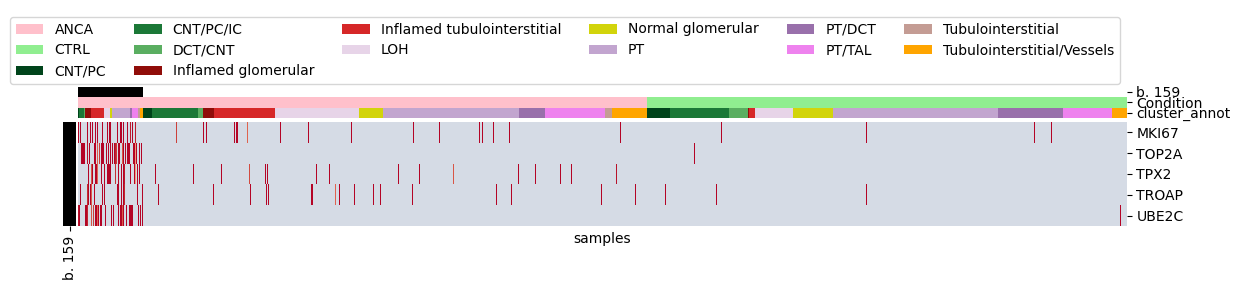

In [49]:
i = [159] 

b = anca_bics.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black",
              figsize = (12,3), 
              dendrogram_ratio=(0.0,0.35),
              colors_ratio=(0.05/12*3, 0.05),
              bic_prefix = "b. ",
              legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
              cluster_rows=False
             )

#plt.savefig("ST_results/Detected_in_ANCA.bic154.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))

### Sex specific expression

b.127: DDX3Y KDM5D ZFY


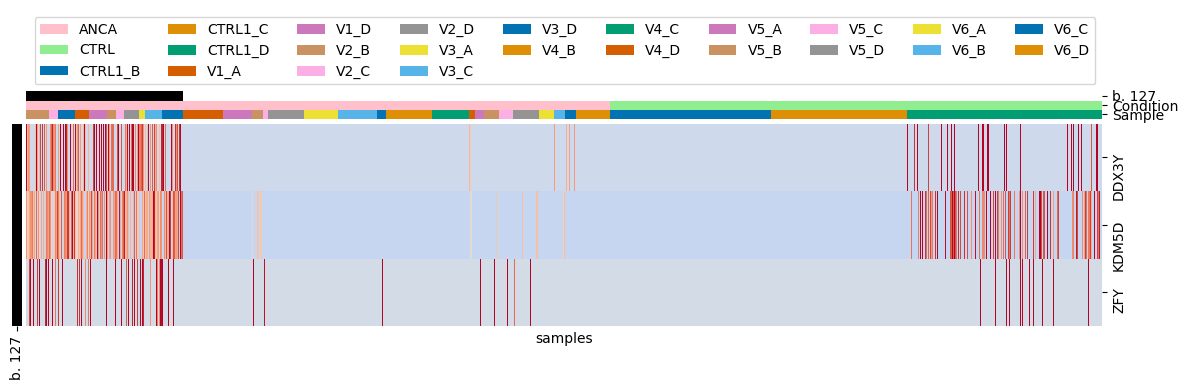

In [50]:
i = [127] 
b = anca_bics.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","Sample"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black",
              figsize = (12,4), 
              dendrogram_ratio=(0.0,0.25),
              colors_ratio=(0.03/12*4, 0.03),
              bic_prefix = "b. ",
              legend_n_cols=10,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
              cluster_rows=False
             )

#plt.savefig("ST_results/Detected_in_ANCA.bic154.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))

In [51]:
z_mean = pd.DataFrame.from_dict({"mean_z":exprs_z2.loc[bic_genes,bic_samples].mean()})
z_mean["Sample"] = slide
z_mean

NameError: name 'bic_genes' is not defined

/tmp/ipykernel_251479/2690304142.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  tmp = g2.set_xticklabels(
/tmp/ipykernel_251479/2690304142.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  tmp = g.set_xticklabels(


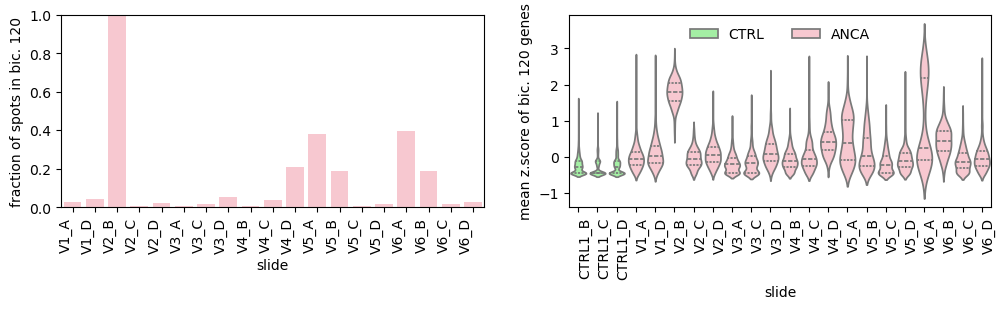

/tmp/ipykernel_251479/2690304142.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  tmp = g2.set_xticklabels(
/tmp/ipykernel_251479/2690304142.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  tmp = g.set_xticklabels(


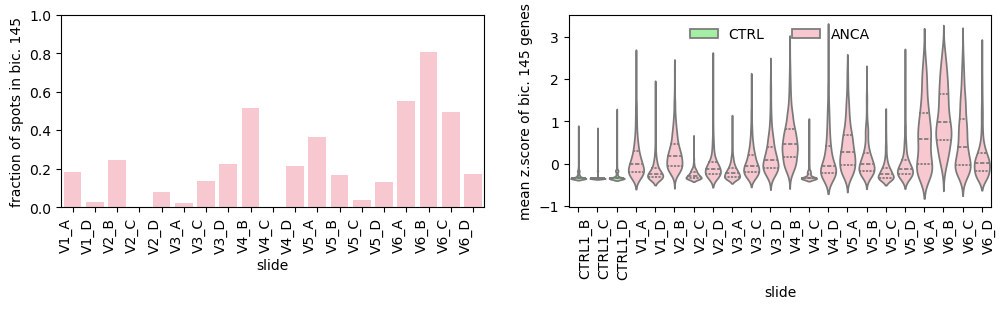

/tmp/ipykernel_251479/2690304142.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  tmp = g2.set_xticklabels(
/tmp/ipykernel_251479/2690304142.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  tmp = g.set_xticklabels(


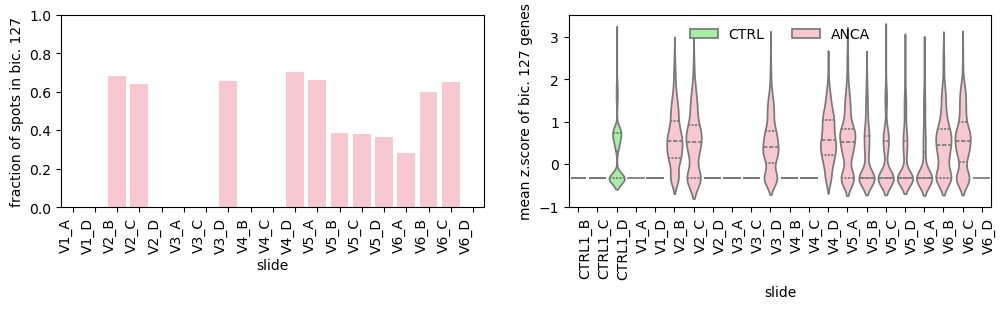

In [403]:
# V2_C - mostly CNT and LOH, low inflammation   132 - PC, 140 - CNT,126 -TAL ,139 - Thin limb
# V4_C - glomeruli and vessels present but inflammation is very mild
for bic_id in  [120,145,127]:#[129, 132, 140, 152, 126, 139, 116, 125, 154, 161]: #[148,152,141]:
    bic_genes = sorted(anca_bics.loc[bic_id,"genes"])
    bic_samples_anca = anca_bics.loc[bic_id,"samples"]
    bic_samples_ctrl = ctrl_bics.loc[bic_id,"samples"]
    bic_df =  {}
    spot_df = []
    for slide in sorted(set(annot2["Sample"].values)):
        spots = set(annot2.loc[annot2["Sample"]==slide,:].index.values)
        bic_samples = sorted(bic_samples_anca.intersection(spots) | bic_samples_ctrl.intersection(spots))
        bg_samples = sorted(spots.difference(set(bic_samples)))
        frac = len(bic_samples)/len(spots)
        # glob. mean z
        mean_z = exprs_z2.loc[bic_genes,bic_samples].stack().dropna().mean()
        # per spot mean
        z_bic =  pd.DataFrame.from_dict({"mean_z":exprs_z2.loc[bic_genes,bic_samples].mean()})
        z_bic["spots"] = "bicluster"
        z_bg = pd.DataFrame.from_dict({"mean_z":exprs_z2.loc[bic_genes,bg_samples].mean()})
        z_bg["spots"] = "background"
        
        z = pd.concat([z_bic,z_bg])
        z["slide"] = slide
        #print(slide, z.shape[0])
        if "CTRL" in slide:
            z["group"] = "CTRL"
        else:
            z["group"] = "ANCA"
        spot_df.append(z)
        
        bic_df[slide] = {"frac":frac, "mean_z":mean_z}
    spot_df = pd.concat(spot_df,axis=0)    
    bic_df = pd.DataFrame.from_dict(bic_df).T
    bic_df['slide'] = bic_df.index 
    bic_df['group'] = "ANCA"
    bic_df.loc[bic_df['slide'].str.contains("CTRL"),"group"] = "CTRL"

    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    
    g2 = sns.barplot(bic_df.loc[bic_df["group"]=="ANCA",],
                     x="slide",y="frac", 
                     hue="group",palette={"ANCA":"pink","CTRL":"palegreen"},
                     legend=False,
                     ax=axes[0])
    axes[0].set(ylim=(0, 1))
    tmp = g2.set_xticklabels(
        g2.get_xticklabels(), 
        rotation=90, 
        horizontalalignment='right'
    )
    tmp = g2.set_ylabel("fraction of spots in bic. %s"%bic_id)
    """
    g = sns.barplot(bic_df,x="slide",y="mean_z",
                    hue="group",palette={"ANCA":"pink","CTRL":"palegreen"},
                    ax=axes[1])
    tmp = g.set_xticklabels(
        g.get_xticklabels(), 
        rotation=90, 
        horizontalalignment='left'
    )
    tmp = g.set_ylabel("mean z.score in bic. %s"%bic_id)
    """
    g = sns.violinplot(spot_df,x="slide",y="mean_z",
                    hue="group",
                    palette={"ANCA":"pink","CTRL":"palegreen"},
                    ax=axes[1],
                    #split=True,
                    inner='quart',
                    density_norm="width", common_norm=False
                    )
    tmp = g.set_xticklabels(
        g.get_xticklabels(), 
        rotation=90, 
        horizontalalignment='left'
    )
    tmp = g.set_ylabel("mean z.score of bic. %s genes"%bic_id)
    ax=axes[1]
    handles, labels = ax.get_legend_handles_labels()  # Get legend information
    ax.legend(handles=handles, labels=labels, title="", ncol=2, loc='upper center', frameon=False)

    tmp = plt.show()

#### plot heatmap for an individual slide

In [ ]:
print(sorted(ctrl_bics.loc[152,"genes"]))

In [ ]:
my_markers = {
    "IFN response":['IFI27', 'IFI44', 'ISG15', 'MX1','OAS3',],
    "B-cells":['CD79A', 'FCRL5', 'IGHG3', 'IGHM',  'IRF4'],
    "T-cells":['CD52', 'LTB', 'TRAC', 'TRBC1', 'TRBC2','CD37','LYZ', 'PTPRC']
}
my_marker_color_dict = {
    "IFN response":"deeppink",
    "B-cells":"orangered",
    "T-cells": "red"
}
my_marker_genes= set([])

bic_to_my_groups = {}
for bic_id in consensus_biclusters.index.values:
    bic_genes = consensus_biclusters.loc[bic_id,"genes"]
    for group in my_markers.keys():
        g = set(my_markers[group])
        my_marker_genes|=g
        if len(bic_genes.intersection(g))>0:
            bic_to_my_groups[bic_id] = group

In [ ]:
#for slide in sorted(set(annot["Sample"].values)):
slide = "V5_A"
i = [152,145,120,116,127] #[129, 132, 140, 152, 126, 139, 116, 125, 154, 161]

b = anca_bics.loc[i,:]
slide_spots = annot.loc[annot["Sample"]==slide,:].index.values
bic_colors = []
for bic_id in i:
    if bic_id in bic_to_marker.keys():
        bic_colors.append(marker_color_dict[bic_to_marker[bic_id]])
    elif bic_id in bic_to_my_groups.keys():
        bic_colors.append(my_marker_color_dict[bic_to_my_groups[bic_id]])
    else:
        bic_colors.append('black')
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["samples"] = b["samples"].apply(lambda x: x.intersection(set(slide_spots)))

g,tmp,tmp2 = draw_heatmap2(exprs_z2.loc[:,slide_spots], b,
                    annot = annot2.loc[slide_spots,["cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= bic_colors,
              figsize = (12,4), 
              dendrogram_ratio=(0.0,0.01),
              colors_ratio=(0.03/12*4, 0.03),
              bic_prefix = "b. ",
              #legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              no_row_colors = False,
              cluster_rows=False,
              highlight_row_labels=marker_genes
             )

ytick_labels = [label.get_text() for label in g.ax_heatmap.get_yticklabels()]
new_ytick_labels = []
for label in ytick_labels:
    if label not in marker_genes and label not in my_marker_genes:
        new_ytick_labels.append("")
    else:
        new_ytick_labels.append(label)
g.ax_heatmap.set_yticklabels(new_ytick_labels,fontsize=8)

ax = g.ax_heatmap
#ax.set_ylabel("")
ax.set_xlabel("ANCA spots (n=%s), slide %s"%(len(slide_spots),slide))

from matplotlib.patches import Patch
# Number of columns in the legend
n_cols = 6
# Create legend elements
legend_elements = [Patch(facecolor=color, label=label) for label, color in my_marker_color_dict.items()]
# Plot an empty figure and add the legend
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
ax.legend(handles=legend_elements, ncol=n_cols, loc='upper center', frameon=False)

#plt.savefig("ST_results/Detected_in_ANCA.biclusters_with_markers.png")
#for bic_id in b.index:
#    print(str(bic_id)+"\t"+bic_to_marker[bic_id]+"\t"," ".join(sorted(b.loc[bic_id,"genes"])))



In [ ]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection

stats = {}
for bic_id in consensus_biclusters.index.values:
    genes = consensus_biclusters.loc[bic_id,"genes"].intersection(set(exprs_z2.index))
    if len(genes)>0:
        #m_anca = exprs_z2.loc[list(genes),annot_anca.index].mean()
        m_bic = exprs_z2.loc[list(genes),list(consensus_biclusters.loc[bic_id,"samples"])].mean()
        m_ctrl = exprs_z2.loc[list(genes),annot_ctrl.index].mean()

        u, pval = mannwhitneyu(m_bic, m_ctrl)
        abs_diff = abs(m_bic.mean()-m_ctrl.mean())
        if consensus_biclusters.loc[bic_id,"direction"] == "DOWN":
            abs_diff = abs(-m_bic.mean()-m_ctrl.mean())
        
        stats[bic_id] = {"pval":pval,
                        "mANCAbic":m_bic.mean(),
                        "mCTRL":m_ctrl.mean(),
                        "abs_diff": abs_diff,
                        "n_genes":len(genes),
                        "genes":genes,
                         "SNR":consensus_biclusters.loc[bic_id,"SNR"]
                        }
    else:
        stats[bic_id] = {"n_genes":0}
        print(bic_id, consensus_biclusters.loc[bic_id,"n_genes"] ,"-> no genes in CTRL")
stats = pd.DataFrame.from_dict(stats).T
passed, adj_pvals  = fdrcorrection(stats["pval"])
stats["pval_BH"] = adj_pvals
stats = stats.sort_values(by = ["abs_diff"],ascending = [False])
#.head(60)

In [330]:
df = stats.loc[stats["pval_BH"]<0.05]
df["genes"] = df["genes"].apply(lambda x: " ".join(x))
df.loc[df["n_genes"]>1,:].sort_values(by=["n_genes","abs_diff"],ascending = [False,False]).to_csv("ST_results/ANCA_specific_biclusters.tsv", sep = "\t")

/tmp/ipykernel_214447/2633237968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genes"] = df["genes"].apply(lambda x: " ".join(x))


In [331]:
d = stats.loc[stats["n_genes"]>1,:]
d.loc[[i for i in not_matched_bics.index if i in d.index],:].sort_values(by="n_genes",ascending=False).head(30)

pval  mANCAbic     mCTRL  abs_diff n_genes  \
125  0.0  0.420783  0.005904  0.414879     271   
121  0.0  0.486145 -0.045616  0.531762     112   
154  0.0   0.72699  -0.41927   1.14626      42   
126  0.0  0.758286 -0.076272  0.834558      36   
129  0.0   0.72546  0.038032  0.687428      27   
140  0.0  0.457909 -0.053487  0.511396      23   
145  0.0  1.163104 -0.308519  1.471623      18   
132  0.0  0.767885  0.028248  0.739637      15   
120  0.0  1.596919 -0.256921  1.853839      10   
152  0.0  1.142511 -0.319354  1.461865       8   
139  0.0  0.855756  -0.13303  0.988786       8   
180  0.0  0.622243 -0.122643  0.744887       7   
161  0.0  0.668963  0.055866  0.613097       7   
148  0.0  1.314154 -0.293296   1.60745       6   
155  0.0  0.566601 -0.064502  0.631104       5   
147  0.0  1.155586 -0.363022  1.518608       5   
163  0.0 -0.205298 -0.282674  0.487972       5   
159  0.0  1.018746 -0.163481  1.182227       5   
146  0.0  1.063923 -0.433021  1.496944       5   
135  0.0  0.942524 -0.127605  1.070129       4   
166  0.0  1.051337 -0.013288  1.064625       4   
143  0.0  1.311923 -0.280513  1.592437       4   
150  0.0  0.919022 -0.262999  1.182021       4   
151  0.0  1.157833  -0.35881  1.516643       4   
141  0.0  1.223233 -0.262014  1.485247       4   
153  0.0  0.491485 -0.066422  0.557907       4   
168  0.0  1.022769 -0.115903  1.138672       4   
164  0.0  1.282687  -0.09806  1.380748       3   
183  0.0  0.578142  0.000894  0.577248       3   
173  0.0   0.86088 -0.171095  1.031975       3   

                                                 genes       SNR pval_BH  
125  {MYO7B, ERBB3, ENPP6, NQO2, CES2, MIOX, CDHR2,...  1.720269     0.0  
121  {HAGH, NAT8, ALDH2, BHMT, TTC38, ASS1, INSR, G...  1.763544     0.0  
154  {C1S, BST2, GGT5, RNASE1, HLA-DPB1, CD99, COL1...  1.411023     0.0  
126  {CACNA2D3, TMEM72, IRX2, KCNJ1, EGF, MECOM, TF...  1.710719     0.0  
129  {CKMT2, SLC8A1, CLNK, INPP5J, STAP1, FOXI1, RH...  1.633459     0.0  
140  {SCIN, IDH2, COBLL1, IVNS1ABP, VAV3, MAL, CLDN...  1.524595     0.0  
145  {IGHG4, MZB1, DERL3, IGHM, IGLC1, TENT5C, IGKC...  1.479826     0.0  
132  {SCNN1B, EHF, BMPR1B, PFKFB3, AQP3, ELF5, HMGC...  1.590563     0.0  
120  {OAS3, RSAD2, ISG15, XAF1, IFI27, IFI44, MX1, ...    1.8728     0.0  
152  {ARHGAP45, PTPRC, LIMD2, CORO1A, LYZ, LSP1, TM...  1.417663     0.0  
139  {ITGB6, KRT7, S100A2, SLC16A5, TACSTD2, SLC34A...    1.5258     0.0  
180   {SLC5A1, GC, RBP4, AGXT, SLC7A13, ALPI, SLC6A18}  1.046095     0.0  
161  {CRABP1, SALL3, SLC12A3, TRPM6, TMEM52B, CPXM2...   1.35164     0.0  
148              {TRBC2, CD52, RAC2, TRAC, LTB, TRBC1}  1.466978     0.0  
155               {MPC1, CYFIP2, RAP1GAP, EFHD1, VAV3}  1.401181     0.0  
147                {HCLS1, CD163, FCGR3A, VSIG4, C1QA}  1.472594     0.0  
163           {PLAAT4, KRT8, C12orf75, KRT18, SLC39A1}  1.325442     0.0  
159                 {TOP2A, TPX2, TROAP, UBE2C, MKI67}  1.361402     0.0  
146                    {SERPINA3, C3, LCN2, NNMT, LTF}  1.474112     0.0  
135                           {CPA3, CTSG, HDC, TPSB2}  1.565123     0.0  
166                     {CPNE6, CYP4A22, MRLN, STRIT1}  1.254047     0.0  
143                  {S100A8, FCGR3A, SLC11A1, S100A9}  1.491223     0.0  
150                      {SPON2, HAVCR1, DLGAP1, CDH6}  1.458867     0.0  
151                       {FCER1G, CTSS, IL10RA, SPI1}  1.457556     0.0  
141                         {CD53, IKZF1, CXCR4, IL7R}  1.517898     0.0  
153                      {AFMID, RAB17, HIBADH, PAQR5}  1.411784     0.0  
168                      {NIBAN3, SPIB, TCL1A, LILRA4}  1.242645     0.0  
164                                  {CNN1, PLN, SPEG}   1.25578     0.0  
183                                  {TSPAN2, NES, F3}  0.969759     0.0  
173                           {LTBP1, IGFBP2, SLC4A11}  1.148944     0.0

In [79]:
#["Condition","cluster_annot","cluster_annot_broad","batch","Sample"]

### CNT

In [67]:
#b.loc[:,"genes"] = b.loc[:,"genes"].apply(lambda x: set(list(x)[:50]+[g for g in x if g in marker_genes]))
#b.loc[:,"genes_up"] = b.loc[:,"genes_up"].intersection(b.loc[:,"genes"])
#b.loc[125,"genes_down"] = b.loc[125,"genes_down"].intersection(b.loc[125,"genes"])
#b.loc[125,"genes"]

'plum'

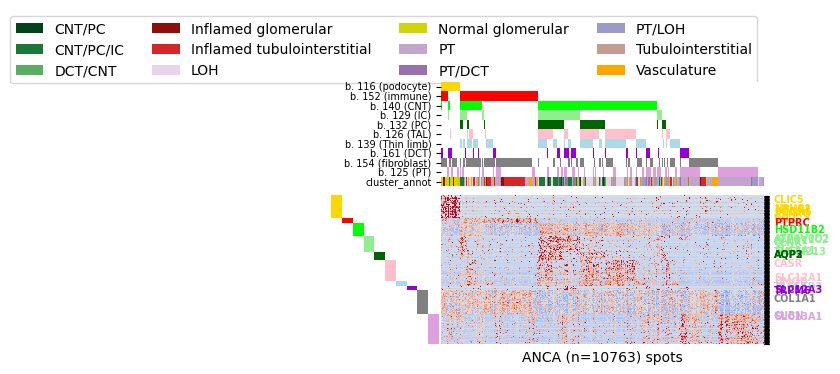

116 (podocyte): ADAMTS19 AL590560.2 ARMH4 C1QL1 CHI3L1 CLIC5 CRB2 CRHBP DDN EHD3 F3 FGF1 HTRA1 IL1RL1 KLK6 KLK7 LMX1B MYLK3 NDNF NES NPHS1 NPHS2 NTNG1 PCOLCE2 PHYHIP PLA2R1 PODXL PTPRO PTPRQ SOST SPOCK1 SPOCK2 SPTB ST6GALNAC3 TNNI1 TNNT2 TPPP3 TSPAN2 WT1
		m:  CLIC5 NPHS1 NPHS2 NTNG1 PODXL PTPRQ WT1
152 (immune): ARHGAP45 CD37 CORO1A LIMD2 LSP1 LYZ PTPRC TMC8
		m:  PTPRC
140 (CNT): ASAP2 CKB CLDN7 COBLL1 CYFIP2 DEFB1 EFHD1 HOXB3 HOXD4 HSD11B2 IDH2 IVNS1ABP MAL MPC1 MUC1 MUC20 RAP1GAP SCIN SCNN1A TFCP2L1 TRIM2 VAV3 WFDC2
		m:  HSD11B2
129 (IC): AQP6 ATP6V0A4 ATP6V0D2 ATP6V1C2 ATP6V1G3 CALB1 CKMT2 CLDN8 CLNK DMRT2 FOXI1 HEPACAM2 INPP5J KIT PIK3C2G PTGER3 RHBG RHCG SLC26A7 SLC4A1 SLC4A9 SLC52A3 SLC8A1 SPINK1 STAP1 TMEM213 TMPRSS2
		m:  ATP6V0D2 ATP6V1C2 CALB1 CLNK SLC8A1 TMEM213
132 (PC): ADGRF1 AQP2 AQP3 BMPR1B CPAMD8 EHF ELF5 FXYD4 HMGCS2 L1CAM PFKFB3 PRR35 SCNN1B SCNN1G STC1
		m:  AQP2 AQP3
126 (TAL): ACPP BDKRB2 CACNA2D3 CASR CLCNKA CLDN16 CLDN19 DUSP9 EGF ESRRB GP2 GSTM3 HOXB6 HSPA2 

In [71]:
best_matches.loc[best_matches["classification"]=="cluster_annot",:]
from unpast.utils.figs import draw_heatmap2

additional_bic_ids = [] # 145,120
additional_bic_interpretations = {145:" (B cells)",120:" (IFNA response)"}
additional_bic_colors = ["black","brown"]
i = [ 116, 152,140,129, 132, 126, 139, 161,154, 125]+additional_bic_ids
#i = [116,152,140,129,132,161,154,125] 
b = consensus_biclusters.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))
bic_colors = [marker_color_dict[bic_to_marker[bic_id]] for bic_id in i if not bic_id in additional_bic_ids]
# downsample - last 50 + biomarkers
b.loc[:,"genes"] = b.loc[:,"genes"].apply(lambda x: set(sorted(x)[-50:]+[g for g in x if g in marker_genes]))
b.loc[:,"genes_up"] = b.loc[:,:].apply(lambda x: x["genes_up"].intersection(x["genes"]),axis=1)
b.loc[:,"genes_down"] = b.loc[:,:].apply(lambda x: x["genes_down"].intersection(x["genes"]),axis=1)

new_bic_names = []
for bic_id in b.index:
    if bic_id in additional_bic_ids:
        new_bic_names.append(str(bic_id)+additional_bic_interpretations[bic_id])
    else:
        new_bic_names.append(str(bic_id)+" ("+bic_to_marker[bic_id]+")")
b.index = new_bic_names
    

g,tmp,tmp_ = draw_heatmap2(exprs_z, b,
                    annot = annot.loc[:,["cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= bic_colors+additional_bic_colors, #,"plum"
              figsize = (6,5), 
              dendrogram_ratio=(0.0,0.2),
              colors_ratio=(0.03/6*5, 0.03),
              bic_prefix = "b. ",
              legend_n_cols=4,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              highlight_row_labels=marker_genes,
              no_row_colors = False,
              cluster_rows=False
             )

ytick_labels = [label.get_text() for label in g.ax_heatmap.get_yticklabels()]
new_ytick_labels = ["" if label not in marker_genes else label for label in ytick_labels]
g.ax_heatmap.set_yticklabels(new_ytick_labels,fontdict={"size":7})
#g.ax_heatmap.set_yticks([])

g.ax_heatmap.set_xlabel("ANCA (n=%s) spots"%exprs_z.shape[1],fontdict={"size":10})
g.ax_col_colors.set_yticklabels(g.ax_col_colors.get_yticklabels(),fontdict={"size":7})
g.ax_col_colors.yaxis.tick_left()

g.ax_row_colors.set_xticks([])

#plt.savefig("ST_results/Fig6_f.ANCA_bic_with_markers.pdf")
#plt.savefig("ST_results/Fig6_f.ANCA_bic_with_markers.png",dpi = 600)

for bic_id in b.index:
    print(bic_id+":"," ".join(sorted(b.loc[bic_id,"genes"])))
    print("\t\tm: "," ".join([g for g in sorted(b.loc[bic_id,"genes"]) if g in marker_genes]))
    
plt.show()

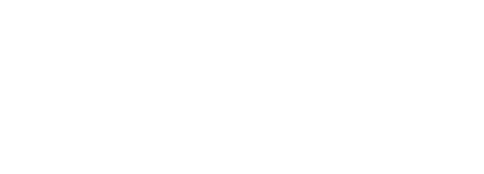

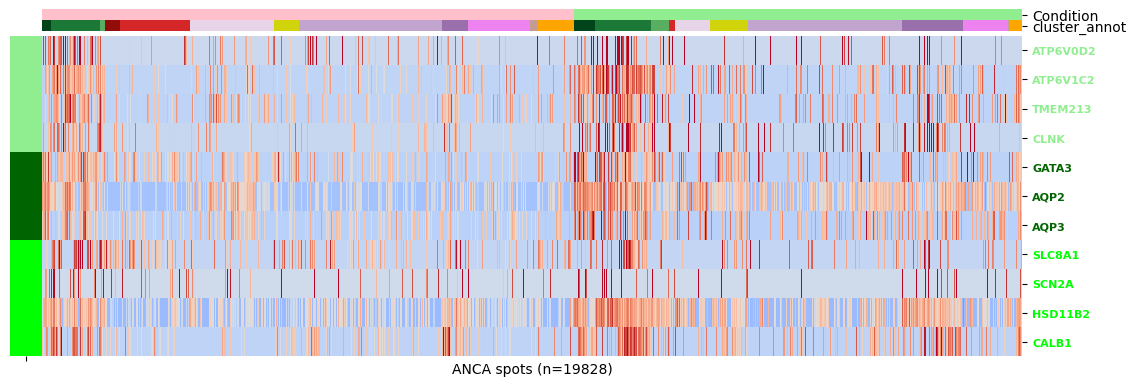

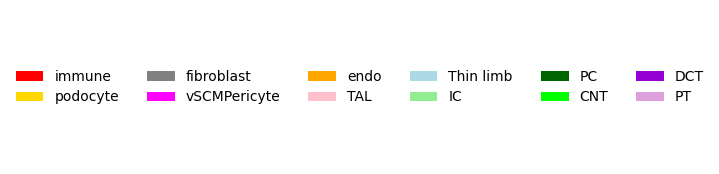

In [86]:
feature_order = []
sample_order = exprs_z2.columns.values
cols = ["Condition","cluster_annot"]
annotation = annot2.loc[:,:].copy()
col_colors = annotation.loc[:,cols]
cluster_columns = True
no_cbar = True

for col in reversed(cols):
    col_color_map = color_dict[col]
    col_colors[col] = col_colors[col].apply(lambda x: col_color_map[x])
    for subt in list(col_color_map.keys()):
        subt_samples = annotation.loc[annotation[col] == subt, :].index
        if cluster_columns:
            new_sample_order = [
                x for x in sample_order if x not in subt_samples
            ] + [x for x in sample_order if x in subt_samples]
            sample_order = new_sample_order
m_colors = []
for m in ['IC',"PC","CNT"]:
    feature_order += markers[m]
    c = marker_color_dict[m]
    m_colors+=[c]*len(markers[m])
m_colors = pd.Series(m_colors, index=feature_order)

from matplotlib.patches import Patch
# Number of columns in the legend
n_cols = 6
# Create legend elements
legend_elements = [Patch(facecolor=color, label=label) for label, color in color_dict["cluster_annot"].items() if label in ["IC","PC","CNT"]]
# Plot an empty figure and add the legend
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
ax.legend(handles=legend_elements, ncol=n_cols, loc='center', frameon=False)
plt.show()

g = sns.clustermap(
        exprs_z2.loc[feature_order, sample_order],
        figsize=(12,4),
        col_cluster=False,
        row_cluster=False,
        dendrogram_ratio=(0.05,0.05),
        colors_ratio=(0.03,0.03),
        cmap=sns.color_palette("coolwarm", as_cmap=True),
        vmin=-3,
        vmax=3,
        xticklabels=False,
        yticklabels=True,
        col_colors=col_colors,
        row_colors=m_colors,
    )
ax = g.ax_heatmap
#ax.set_ylabel("")
ax.set_xlabel("ANCA spots (n=%s)"%exprs_z2.shape[1])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
# g.cax.set_position([.10, .2, .03, .45])
# from https://stackoverflow.com/questions/47350879/seaborn-clustermap-subplots-adjust-cancels-colour-bar-relocation
dendro_box = g.ax_row_dendrogram.get_position()
dendro_box.x0 = (dendro_box.x0 + 2 * dendro_box.x1) / 3
g.cax.set_position(dendro_box)
# Move the ticks to the left (https://stackoverflow.com/a/36939552/1878788)
g.cax.yaxis.set_ticks_position("left")

if no_cbar:
        g.ax_cbar.set_visible(False)
        
highlight_row_labels = marker_genes # marker genes
for row_tick in ax.get_yticklabels():
    if row_tick.get_text() in highlight_row_labels:
        
        row_tick.set_weight("bold")
        for m_id in marker_order:
            if row_tick.get_text() in markers[m_id]:
                row_tick.set_color(marker_color_dict[m_id])
                
# Number of columns in the legend
n_cols = 6
# Create legend elements
legend_elements = [Patch(facecolor=color, label=label) for label, color in marker_color_dict.items()]
# Plot an empty figure and add the legend
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
ax.legend(handles=legend_elements, ncol=n_cols, loc='center', frameon=False)
plt.show()

# Loop of Henle looks different in ANCA and CTRL

b.126 (TAL): ACPP BDKRB2 CACNA2D3 CASR CLCNKA CLDN16 CLDN19 DUSP9 EGF ESRRB GP2 GSTM3 HOXB6 HSPA2 IRX1 IRX2 KCNJ1 KNG1 MECOM MFSD4A MTURN PADI2 POU3F3 PPP1R1A PROM2 RANBP3L SCTR SIM2 SLC12A1 SLC5A3 SLC9A3 TFAP2B TMEM72 TSPAN8 UMOD WNK4
b.139 (Thin limb): ITGB6 KRT7 RASD1 S100A2 SLC16A5 SLC34A2 SLPI TACSTD2


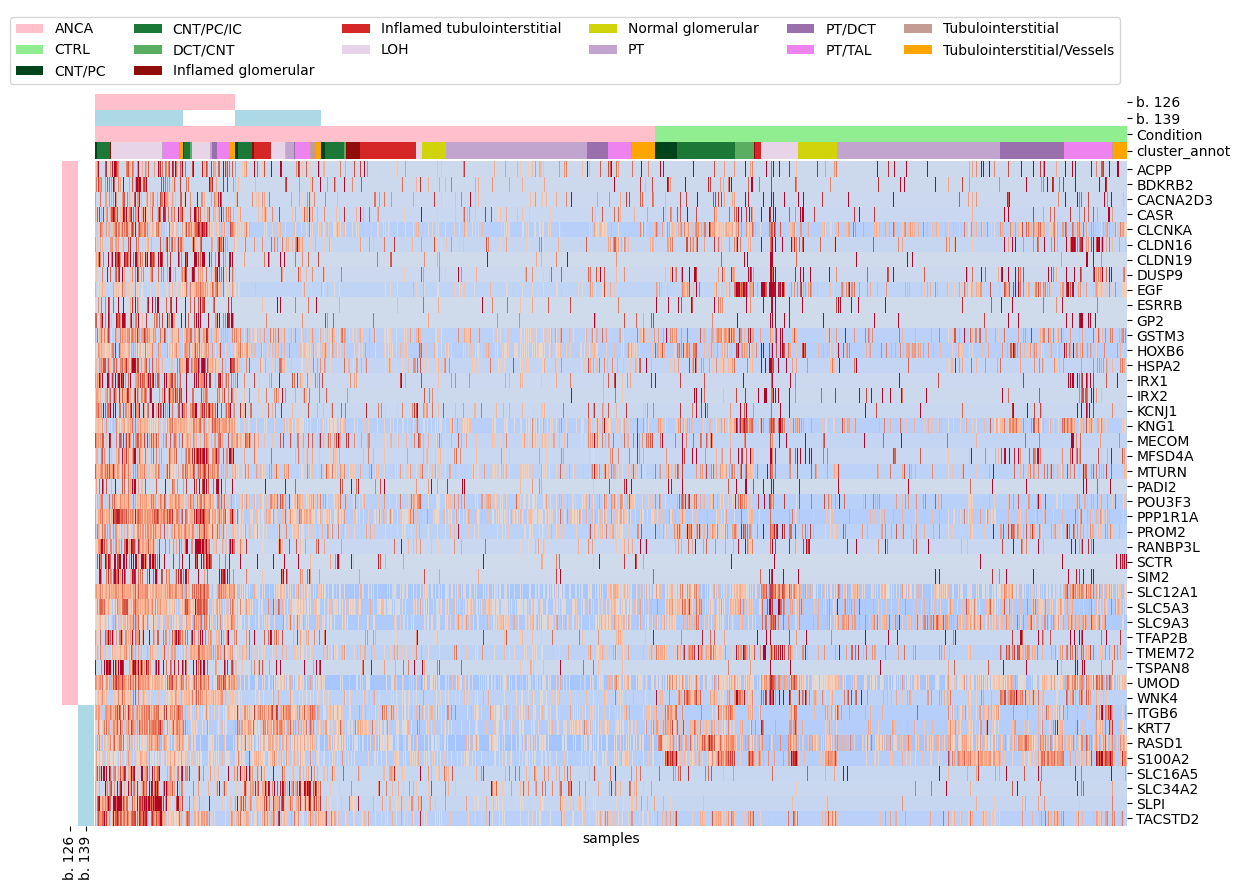

In [603]:
#best_matches.loc[best_matches["classification"]=="cluster_annot",:]
from unpast.utils.figs import draw_heatmap2
#i = [129,140]
#i = [129,152,116,126]
i = [126,139]  # 126 TAL, 139 - Thin limb 
b = consensus_biclusters.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= ["pink","lightblue","grey"], #,"plum"
              figsize = (12,9), 
              dendrogram_ratio=(0.0,0.1),
              colors_ratio=(0.02/12*9, 0.02),
              bic_prefix = "b. ",
              legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              highlight_row_labels=feature_order,
              no_row_colors = False,
              cluster_rows=False
             )
#plt.savefig("ST_results/Detected_in_ANCA.immune.png")
for bic_id in b.index:
    print("b."+str(bic_id)+" ("+bic_to_marker[bic_id]+"):"," ".join(sorted(b.loc[bic_id,"genes"])))

## DCT and PT

b.161 (DCT): CPXM2 CRABP1 SALL3 SLC12A3 TMEM52B TRIM50 TRPM6
b.121 (PT): ACAA1 ACAA2 ACADM ACAT1 ACO2 ACSF2 ACY1 ADI1 AGPAT3 AKR1A1 ALDH1L1 ALDH2 ALDH3A2 ALDH4A1 ALDH6A1 ALDOB AMACR AMN ANPEP APOE AQP1 ASS1 BBOX1 BHMT BHMT2 BIN1 C11orf54 CLTRN CMBL CTSA CTSH CXCL14 CYB5A DAB2 DCXR DNPH1 DPEP1 ECHS1 ENPEP EPHX2 ETFB FAAH FAM20C FBP1 FN3K FUT6 GALNT11 GATM GGT2 GPX3 GRHPR HAGH HDHD3 HPN IL32 INSR KCNJ15 LIME1 LRP2 MAF MARC2 MFSD12 MGST1 MPST MSRA MT1E MT1F MT1G MT1X NAT8 NIT2 NSMF OCIAD2 OGDHL PBLD PDZK1 PDZK1IP1 PEPD PGPEP1 PIGR PLIN2 PTGR1 PTH1R RAB11FIP3 RASSF4 RBP5 SAT2 SCRN2 SH3YL1 SLC17A1 SLC22A2 SLC2A4RG SLC37A4 SLC3A1 SLC3A2 SLC47A1 SLC47A2 SLC9A3R1 SMIM24 STX3 SUCLG1 SULT1C2 TCN2 TLN2 TMEM176A TMEM176B TMEM37 TNFRSF21 TSPAN1 TTC38 TTYH3 TXN
b.125 (PT): A1CF ABAT ABCC2 ABCC6 ABHD6 ACAD11 ACADSB ACE ACE2 ACMSD ACO1 ACOT13 ACOT2 ACOT7 ACOX2 ACP5 ACSM5 ACY3 ADH6 AFM AGMAT AGT AGXT2 AIFM1 AK4 AKR1C3 AKR7A3 ALAD ALB ALDH1B1 ALDH8A1 ALPL ANK2 ANKS4B AOC1 AOX1 APOM AQP7 ASL ASPA ASPDH A

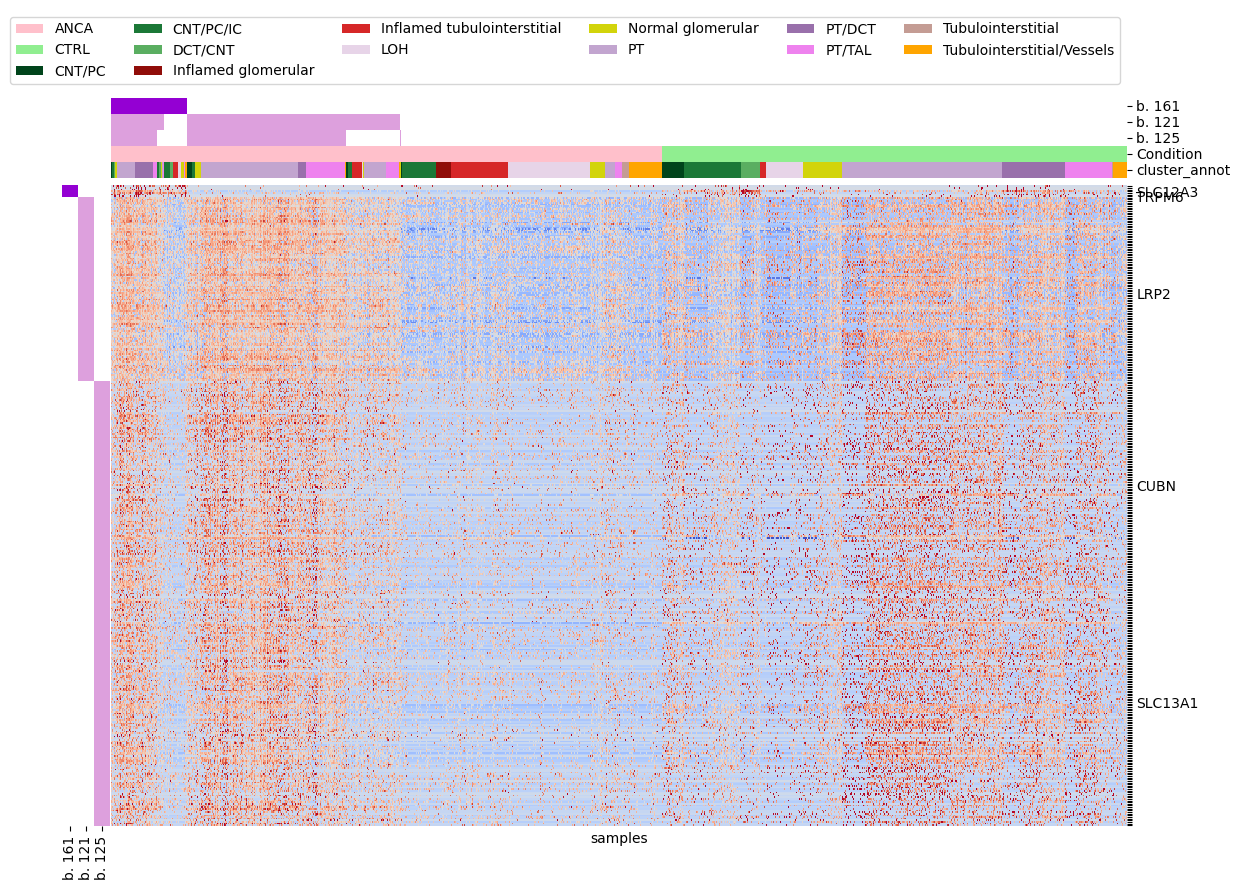

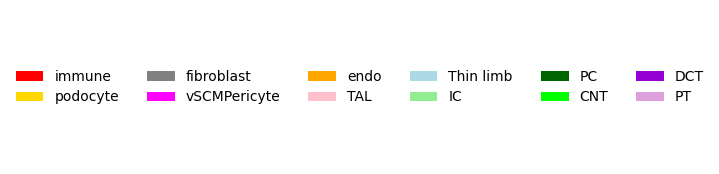

In [580]:
best_matches.loc[best_matches["classification"]=="cluster_annot",:]
from unpast.utils.figs import draw_heatmap2

i = [161,121,125]  # 161 - DCT, 121+125 - PT
bic_colors = [marker_color_dict[bic_to_marker[bic_id]] for bic_id in i]
b = consensus_biclusters.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

g, tmp, tmp2 = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= bic_colors,
              figsize = (12,9), 
              dendrogram_ratio=(0.0,0.1),
              colors_ratio=(0.02/12*9, 0.02),
              bic_prefix = "b. ",
              legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              highlight_row_labels=feature_order,
              no_row_colors = False,
                    cluster_rows=False
             )

ytick_labels = [label.get_text() for label in g.ax_heatmap.get_yticklabels()]
new_ytick_labels = ["" if label not in marker_genes else label for label in ytick_labels]
g.ax_heatmap.set_yticklabels(new_ytick_labels)


#plt.savefig("ST_results/Detected_in_ANCA.biclusters_with_markers.png")
for bic_id in b.index:
    print("b."+str(bic_id)+" ("+bic_to_marker[bic_id]+"):"," ".join(sorted(b.loc[bic_id,"genes"])))
    
from matplotlib.patches import Patch
# Number of columns in the legend
n_cols = 6
# Create legend elements
legend_elements = [Patch(facecolor=color, label=label) for label, color in marker_color_dict.items()]
# Plot an empty figure and add the legend
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
ax.legend(handles=legend_elements, ncol=n_cols, loc='center', frameon=False)
plt.show()

### Proliferative

b.159: MKI67 TOP2A TPX2 TROAP UBE2C
b.123: SAA1 SAA2


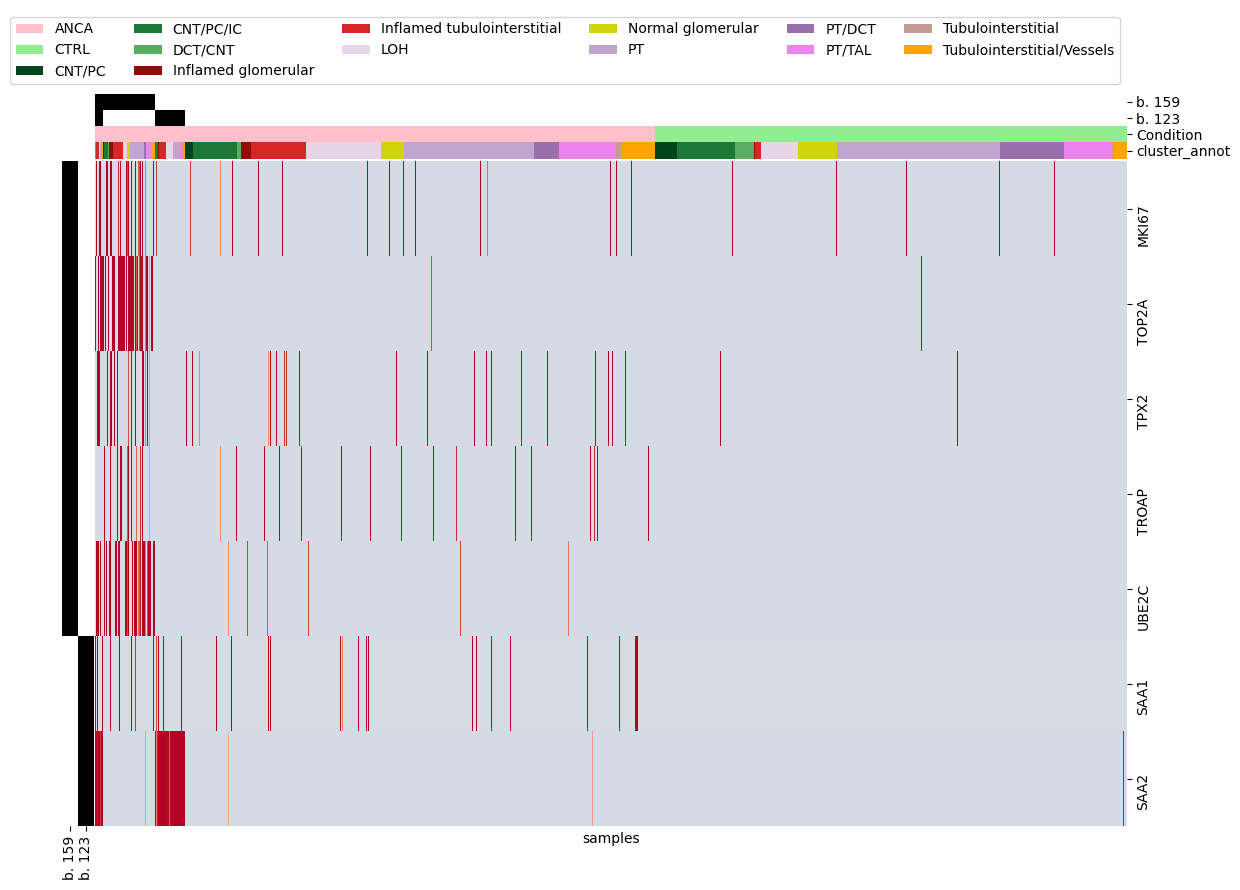

In [468]:
i = [159,123]  # 161 - DCT, 121+125 - PT
b = consensus_biclusters.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

tmp = draw_heatmap2(exprs_z2, b,
                    annot = annot2.loc[:,["Condition","cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= "black", #,
              figsize = (12,9), 
              dendrogram_ratio=(0.0,0.1),
              colors_ratio=(0.02/12*9, 0.02),
              bic_prefix = "b. ",
              legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              highlight_row_labels=feature_order,
              no_row_colors = False,
                    cluster_rows=False
             )
#plt.savefig("ST_results/Detected_in_ANCA.immune.png")
for bic_id in b.index:
    print("b."+str(bic_id)+":"," ".join(sorted(b.loc[bic_id,"genes"])))

In [467]:
best_matches.loc[best_matches["classification"]=="cluster_annot",:]#.values

bm_id       ARI    weight  adj_pval is_enriched  \
PT                            125  0.291878  0.269906  0.001618        True   
Inflamed tubulointerstitial   148  0.340497  0.130726  0.001199        True   
CNT/PC/IC                     129   0.41103  0.090402  0.000848        True   
Normal glomerular             116  0.731898  0.047106  0.000433        True   
DCT/CNT                       161  0.104933  0.010871   0.00019        True   
CNT/PC                        138  0.121241  0.017281   0.00015        True   
Inflamed glomerular           116   0.22819  0.028152  0.000236        True   
PT/DCT                        161  0.259588  0.048128  0.000584        True   
Tubulointerstitial            123   0.05534   0.01533  0.000243        True   
Vasculature                   130  0.245018   0.06736  0.000452        True   
PT/LOH                        180  0.426239  0.117346  0.000848        True   
LOH                           126   0.38299  0.157391  0.001268        True   

                                                                       samples  \
PT                           {TAACTATCGAAGGTCC-1_V4_B, AGCTGAAGTAAACCAA-1_V...   
Inflamed tubulointerstitial  {TCCGTAACCACAATCC-1_V1_A, TTATGAATGAAAGGGA-1_V...   
CNT/PC/IC                    {TATTCAATTCTAATCC-1_V5_A, AGTCCCGCCTTTAATT-1_V...   
Normal glomerular            {ACAAGGAAATCCGCCC-1_V3_C, AAGCCGAAGCGGTTTA-1_V...   
DCT/CNT                      {TATTCAATTCTAATCC-1_V5_A, TTATGAATGAAAGGGA-1_V...   
CNT/PC                       {GAAAGAACAGCGTTAT-1_V4_C, AGACCATGGGATACAA-1_V...   
Inflamed glomerular          {ACAAGGAAATCCGCCC-1_V3_C, AAGCCGAAGCGGTTTA-1_V...   
PT/DCT                       {TATTCAATTCTAATCC-1_V5_A, TTATGAATGAAAGGGA-1_V...   
Tubulointerstitial           {CTTTAGTGCTATTATT-1_V4_B, GCTGCACGGTTTCTTA-1_V...   
Vasculature                  {TCCCGGGTGTGCTGCT-1_V4_D, CCATTCCCTGCCCACA-1_V...   
PT/LOH                       {CATGGTAAGTAGCGTT-1_V1_A, GAGGCTATCAAAGTCG-1_V...   
LOH                          {CGTGCACACCACTGTA-1_V5_D, CATGGTAAGTAGCGTT-1_V...   

                            n_samples classification  
PT                               4028  cluster_annot  
Inflamed tubulointerstitial      2024  cluster_annot  
CNT/PC/IC                        1964  cluster_annot  
Normal glomerular                 632  cluster_annot  
DCT/CNT                          1485  cluster_annot  
CNT/PC                            516  cluster_annot  
Inflamed glomerular               632  cluster_annot  
PT/DCT                           1485  cluster_annot  
Tubulointerstitial                719  cluster_annot  
Vasculature                       391  cluster_annot  
PT/LOH                           1884  cluster_annot  
LOH                              2692  cluster_annot

b.152 (immune): ARHGAP45 CD37 CORO1A LIMD2 LSP1 LYZ PTPRC TMC8
b.126 (TAL): ACPP BDKRB2 CACNA2D3 CASR CLCNKA CLDN16 CLDN19 DUSP9 EGF ESRRB GP2 GSTM3 HOXB6 HSPA2 IRX1 IRX2 KCNJ1 KNG1 MECOM MFSD4A MTURN PADI2 POU3F3 PPP1R1A PROM2 RANBP3L SCTR SIM2 SLC12A1 SLC5A3 SLC9A3 TFAP2B TMEM72 TSPAN8 UMOD WNK4
b.139 (Thin limb): ITGB6 KRT7 RASD1 S100A2 SLC16A5 SLC34A2 SLPI TACSTD2
b.161 (DCT): CPXM2 CRABP1 SALL3 SLC12A3 TMEM52B TRIM50 TRPM6
b.121 (PT): ACAA1 ACAA2 ACADM ACAT1 ACO2 ACSF2 ACY1 ADI1 AGPAT3 AKR1A1 ALDH1L1 ALDH2 ALDH3A2 ALDH4A1 ALDH6A1 ALDOB AMACR AMN ANPEP APOE AQP1 ASS1 BBOX1 BHMT BHMT2 BIN1 C11orf54 CLTRN CMBL CTSA CTSH CXCL14 CYB5A DAB2 DCXR DNPH1 DPEP1 ECHS1 ENPEP EPHX2 ETFB FAAH FAM20C FBP1 FN3K FUT6 GALNT11 GATM GGT2 GPX3 GRHPR HAGH HDHD3 HPN IL32 INSR KCNJ15 LIME1 LRP2 MAF MARC2 MFSD12 MGST1 MPST MSRA MT1E MT1F MT1G MT1X NAT8 NIT2 NSMF OCIAD2 OGDHL PBLD PDZK1 PDZK1IP1 PEPD PGPEP1 PIGR PLIN2 PTGR1 PTH1R RAB11FIP3 RASSF4 RBP5 SAT2 SCRN2 SH3YL1 SLC17A1 SLC22A2 SLC2A4RG SLC37A4 SLC3

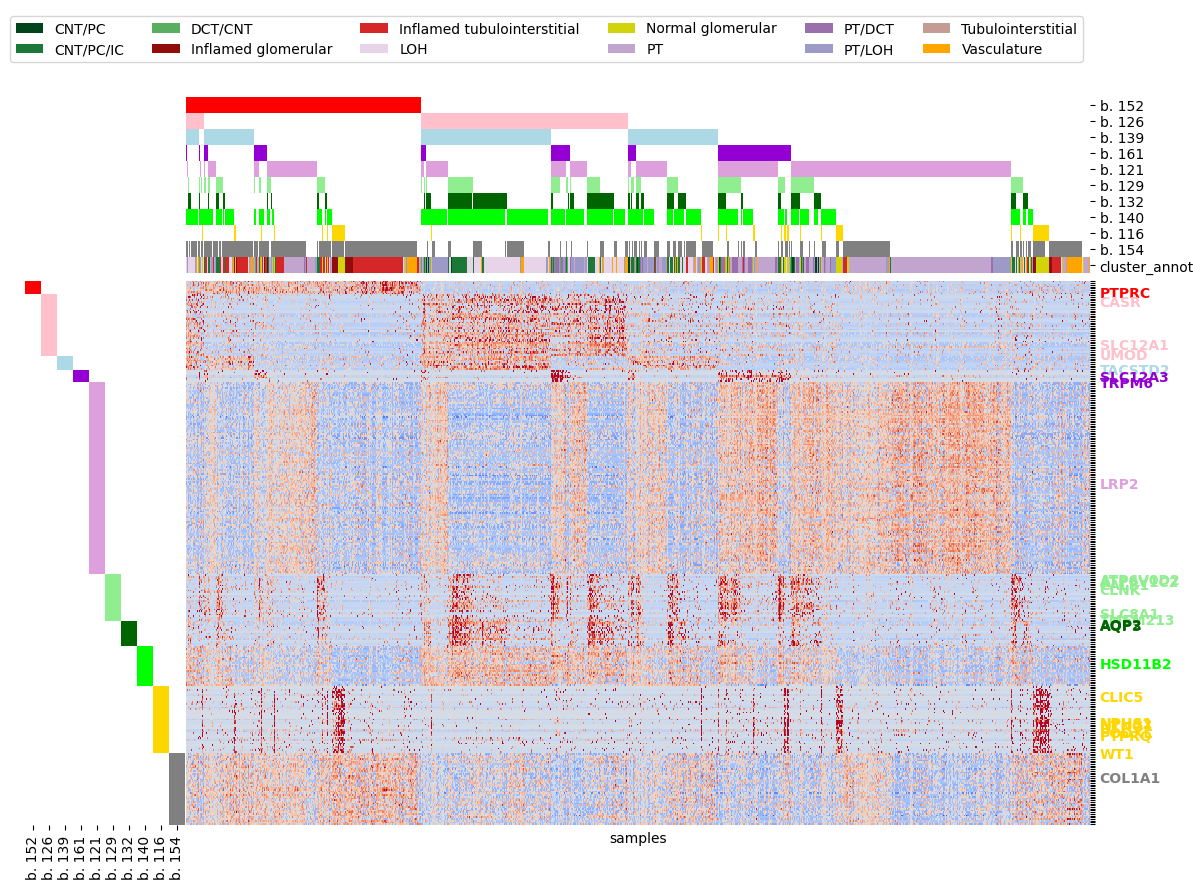

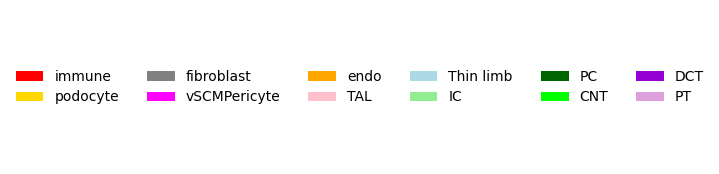

In [71]:
best_matches.loc[best_matches["classification"]=="cluster_annot",:]
from unpast.utils.figs import draw_heatmap2

i = [152,126,139,161,121,129,132,140,116,154]  # ,125
bic_colors = [marker_color_dict[bic_to_marker[bic_id]] for bic_id in i]
#bic_colors.append({130:"orange"})
b = consensus_biclusters.loc[i,:]
b["genes"] = b["genes"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_up"] = b["genes_up"].apply(lambda x: x.intersection(set(exprs_z2.index)))
b["genes_down"] = b["genes_down"].apply(lambda x: x.intersection(set(exprs_z2.index)))

g, tmp, tmp2 = draw_heatmap2(exprs_z, b,
                    annot = annot.loc[:,["cluster_annot"]], # ["Sample","leiden_1","leiden_2","annot_v2","cluster_annot","cluster_annot_broad"]
                    color_dict=color_dict,
              bicluster_colors= bic_colors,#["red","pink","lightblue","darkviolet","violet","green"], #,"plum"
              figsize = (12,9), 
              dendrogram_ratio=(0.0,0.1),
              colors_ratio=(0.02/12*9, 0.02),
              bic_prefix = "b. ",
              legend_n_cols=6,
              no_cbar=True,
              col_labels = False,
              row_labels = True,
              highlight_row_labels=feature_order,
              no_row_colors = False,
                    cluster_rows=False
             )
ytick_labels = [label.get_text() for label in g.ax_heatmap.get_yticklabels()]
new_ytick_labels = ["" if label not in marker_genes else label for label in ytick_labels]
g.ax_heatmap.set_yticklabels(new_ytick_labels)


#plt.savefig("ST_results/Detected_in_ANCA.biclusters_with_markers.png")
for bic_id in b.index:
    print("b."+str(bic_id)+" ("+bic_to_marker[bic_id]+"):"," ".join(sorted(b.loc[bic_id,"genes"])))
    
# Number of columns in the legend
n_cols = 6
# Create legend elements
legend_elements = [Patch(facecolor=color, label=label) for label, color in marker_color_dict.items()]
# Plot an empty figure and add the legend
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
ax.legend(handles=legend_elements, ncol=n_cols, loc='center', frameon=False)
plt.show()

In [ ]:
d